In [1]:
import numpy as np
import holoviews as hv
import math
import scipy.sparse.linalg as linalg
#%matplotlib inline
import matplotlib.pyplot as plt

hv.notebook_extension()

In [2]:
dx = 1
L = 4000
dk = 2*math.pi/L
k0 = -0.5*L*dk
dt = 0.6
steps = 1000

In [3]:
def barrier(x):
    if x>1500 and x<2000:
        return 2
    else:
        return 0

In [18]:
x = np.arange(0, L, 1)
k = k0 + dk*x

print(x)
psi_r = np.zeros(shape = (int(L), int(steps))) + 0j

psi_r[:, 0] = np.exp(-0.5*(x-800)**2/100**2 - 1j*0.05*x)
psi_k = np.zeros(shape = (int(L), int(steps)))+0j

#   Normalize wave function
psi_r[:, 0] = psi_r[:,0]/np.linalg.norm(psi_r[:, 0])

V = np.vectorize(barrier)(x)

[   0    1    2 ..., 3997 3998 3999]


In [19]:
plt.plot(x, np.real(psi_r[:,150]))
plt.show()

In [20]:
for i in range(0, steps-1):
    psi_k[:, i] = np.fft.fft(psi_r[:, i]*np.exp(-dt*V*1j))
    psi_r[:, i+1] = np.fft.ifft(psi_k[:, i] *np.exp(-dt*1j*k**2))

b':HoloMap   [Time]\n   :Overlay\n      .Curve.I  :Curve   [x]   (y)\n      .Curve.II :Curve   [x]   (y)'
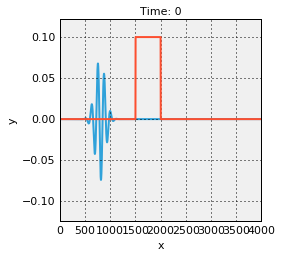
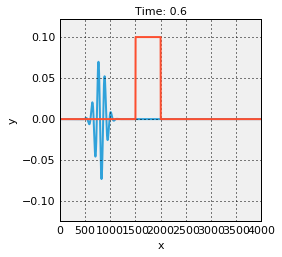
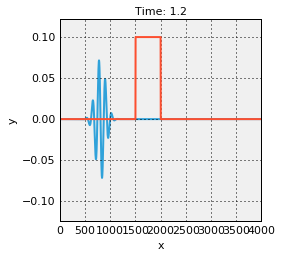
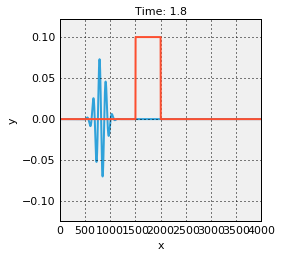
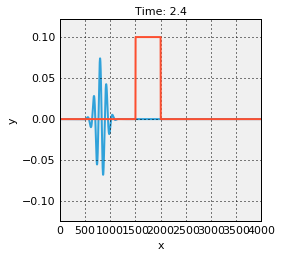
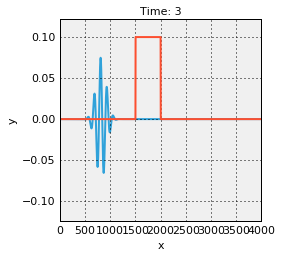
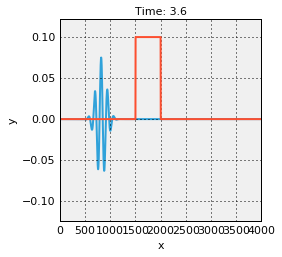
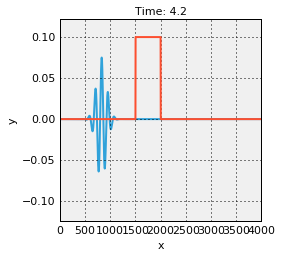
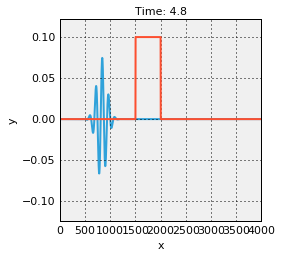
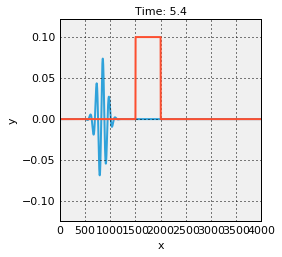
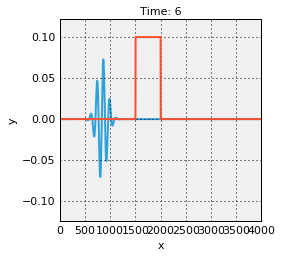
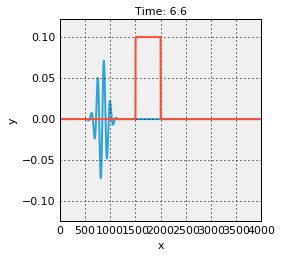
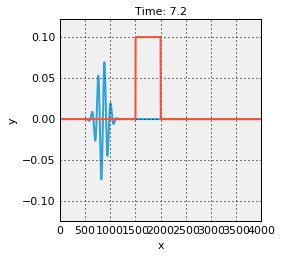
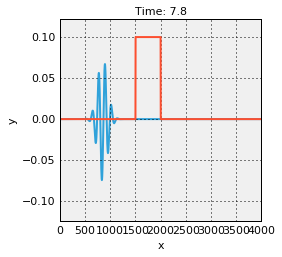
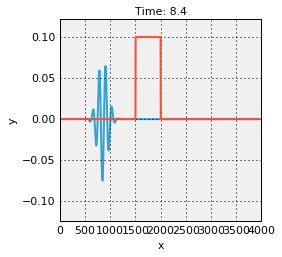
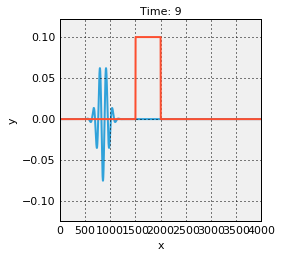
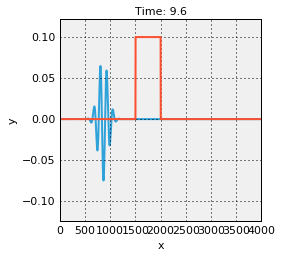
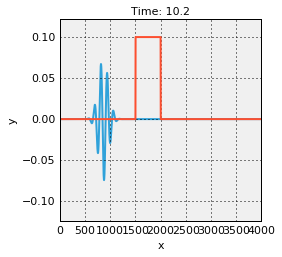
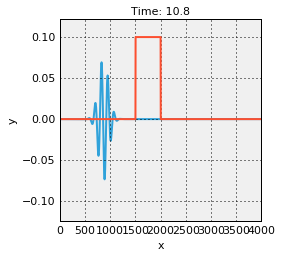
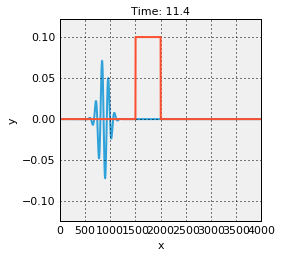
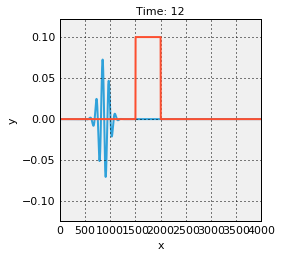
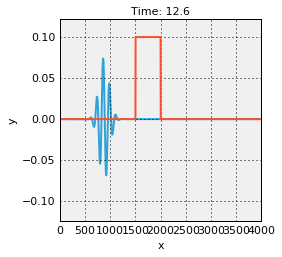
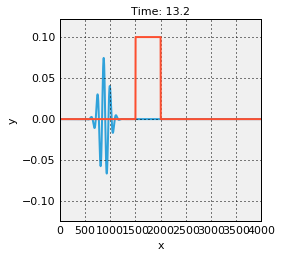
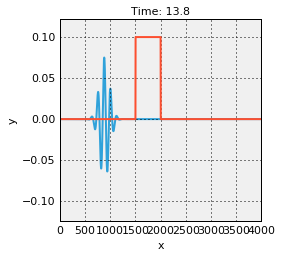
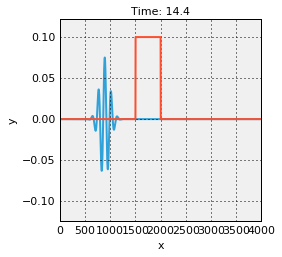
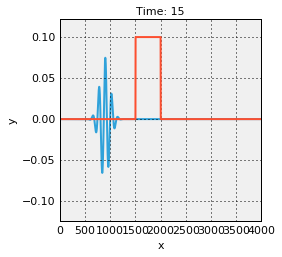
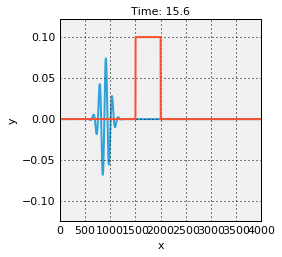
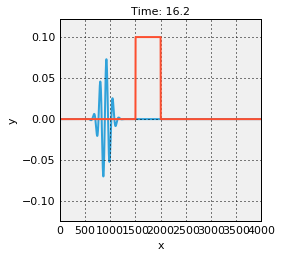
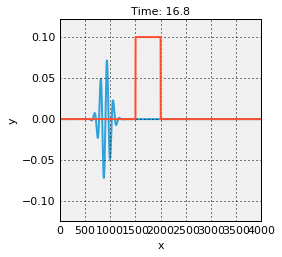
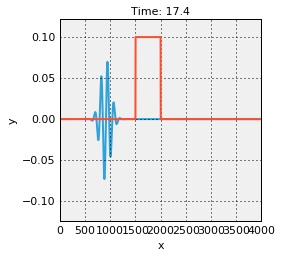
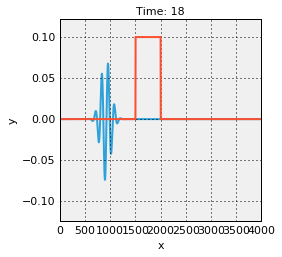
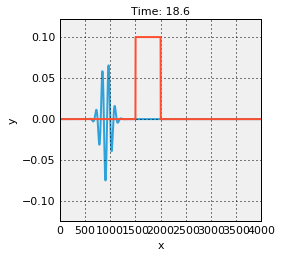
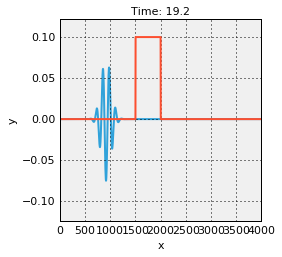
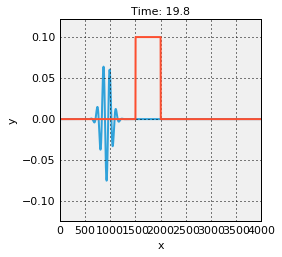
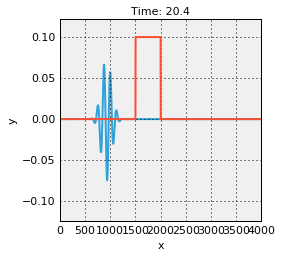
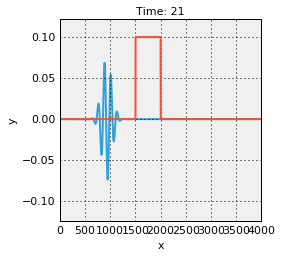
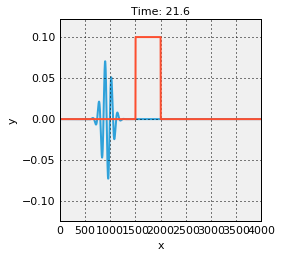
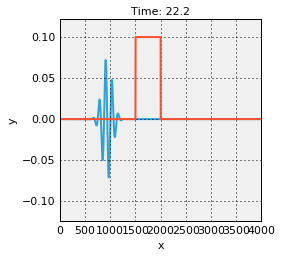
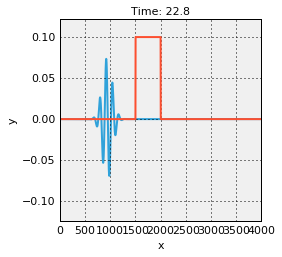
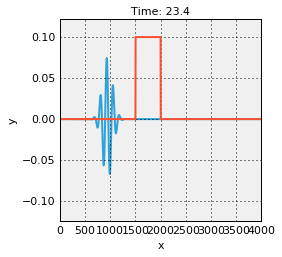
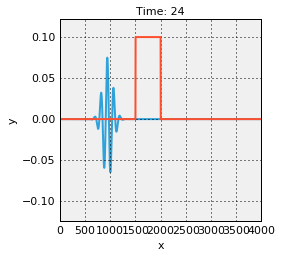
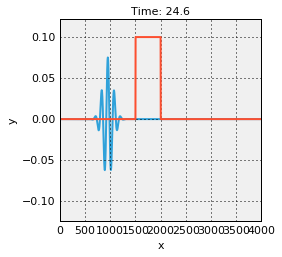
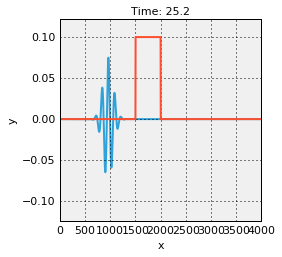
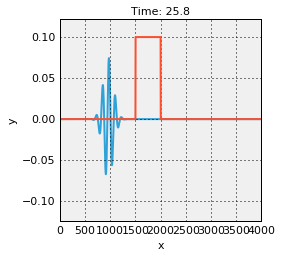
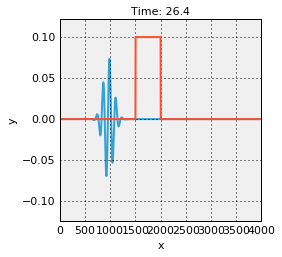
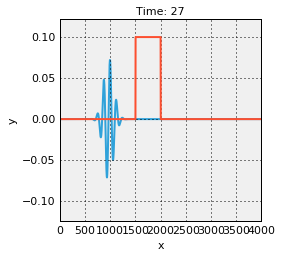
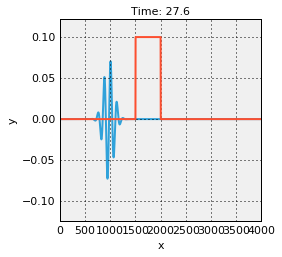
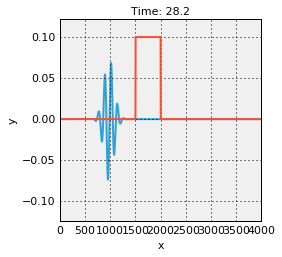
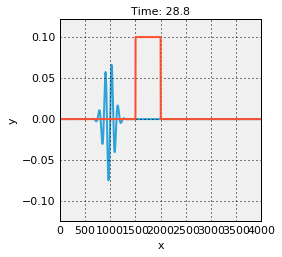
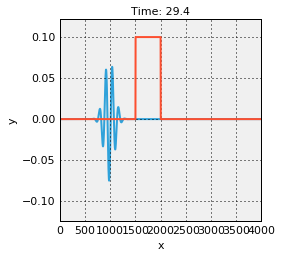
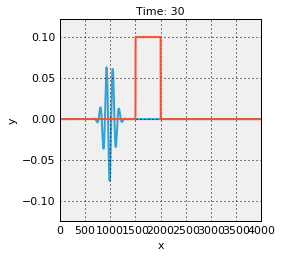
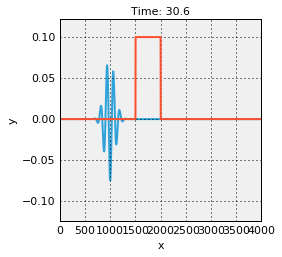
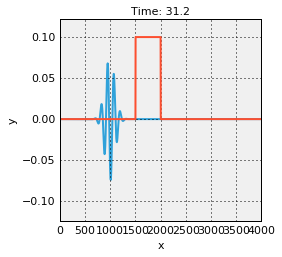
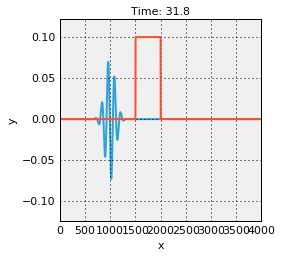
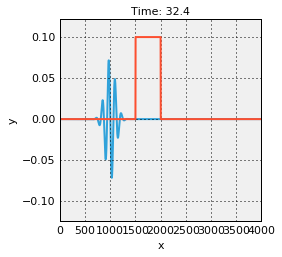
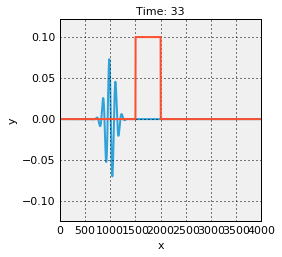
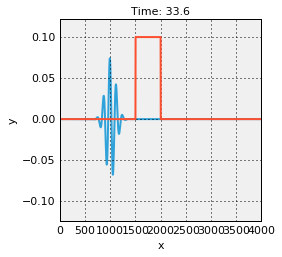
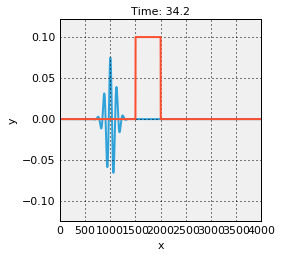
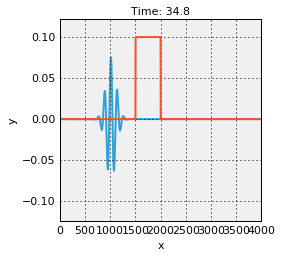
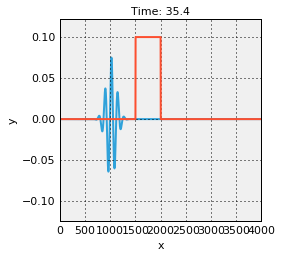
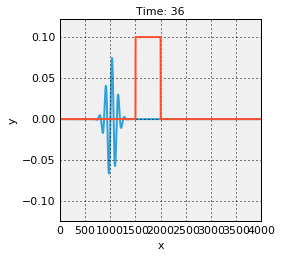
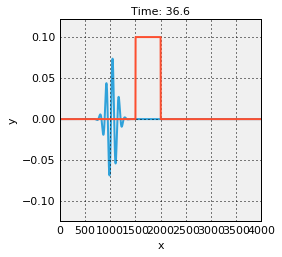
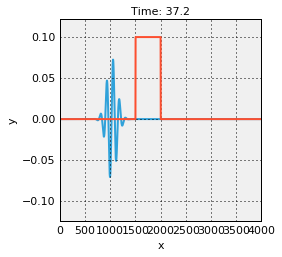
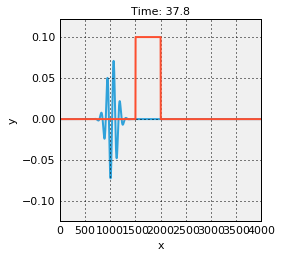
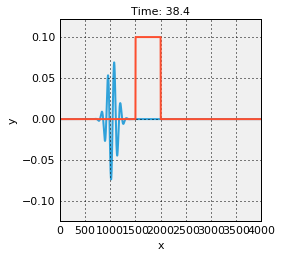
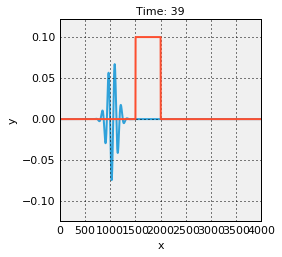
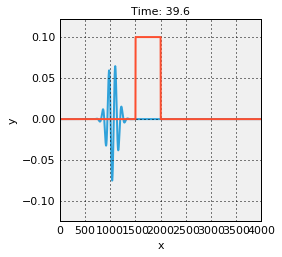
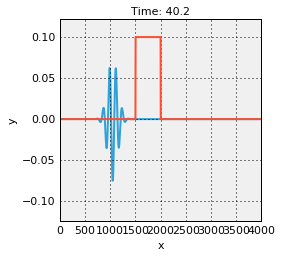
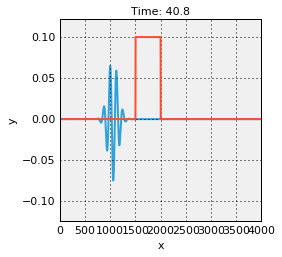
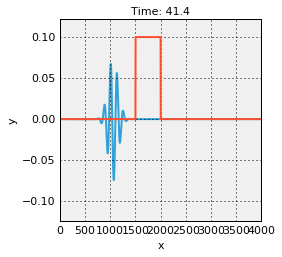
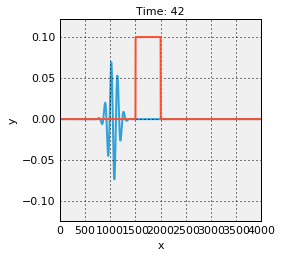
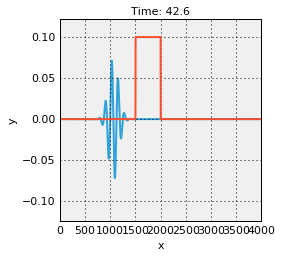
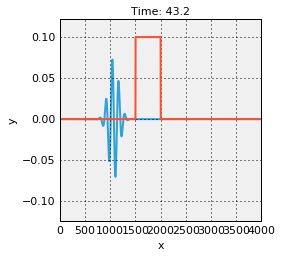
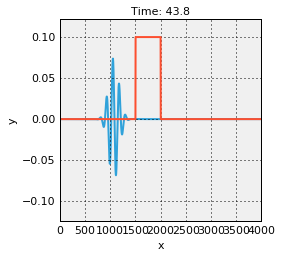
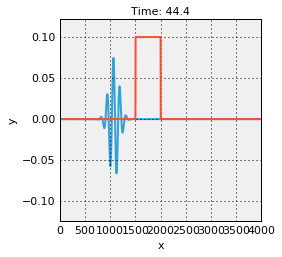
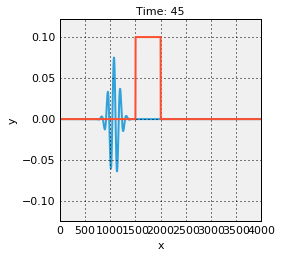
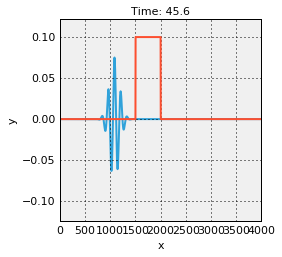
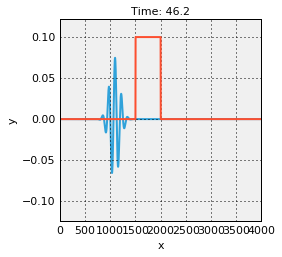
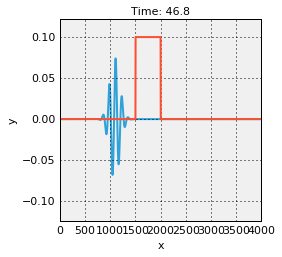
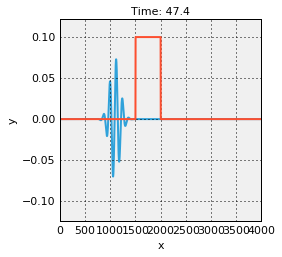
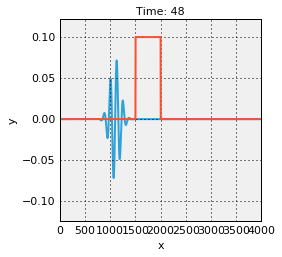
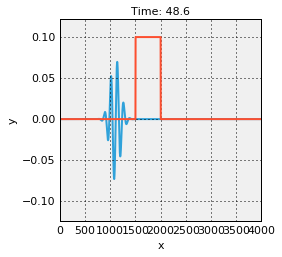
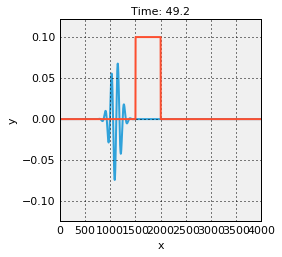
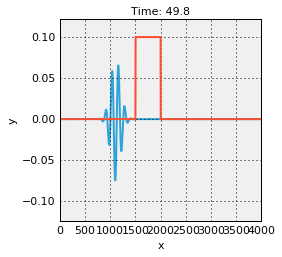
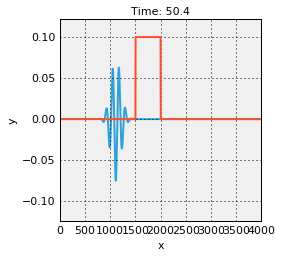
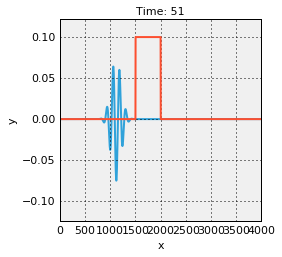
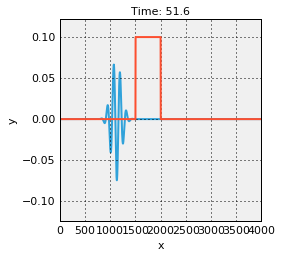
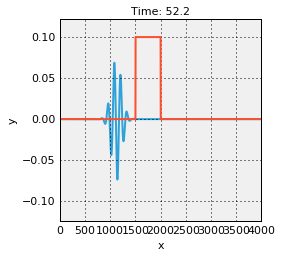
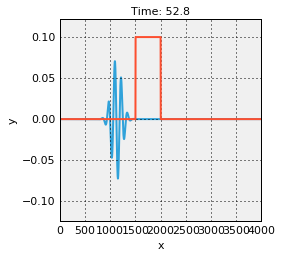
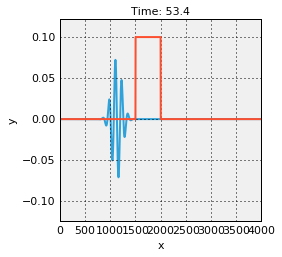
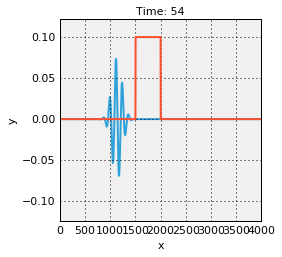
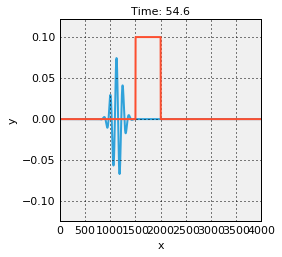
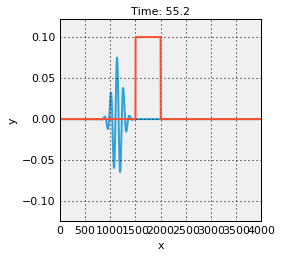
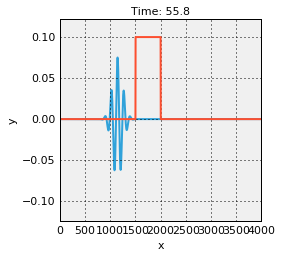
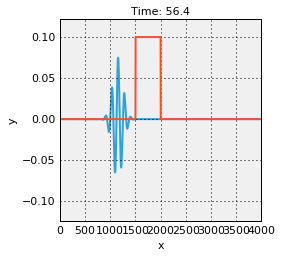
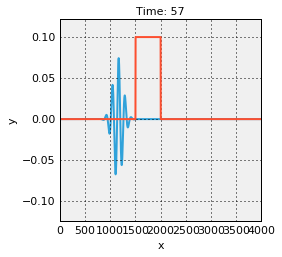
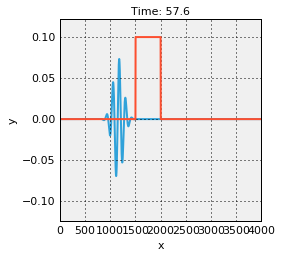
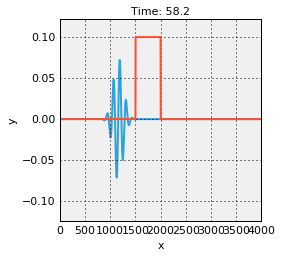
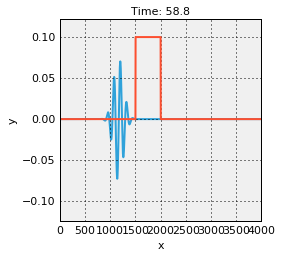
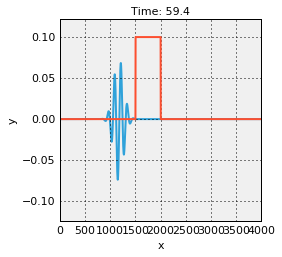
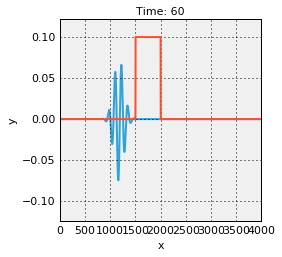
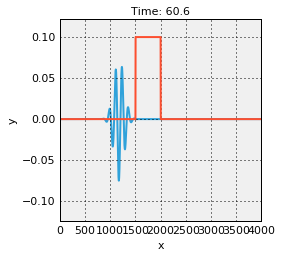
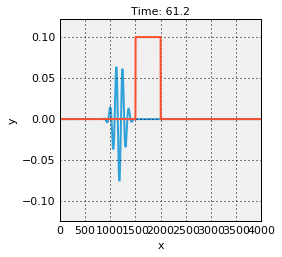
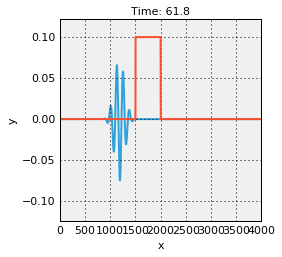
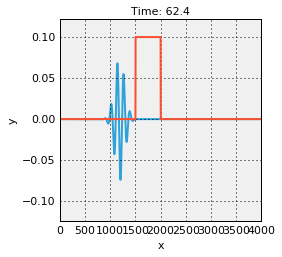
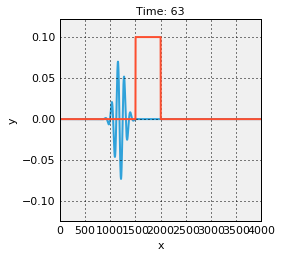
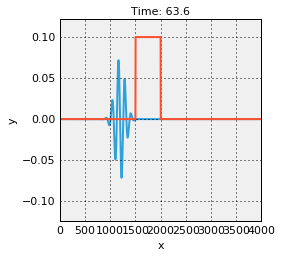
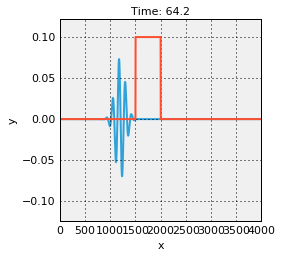
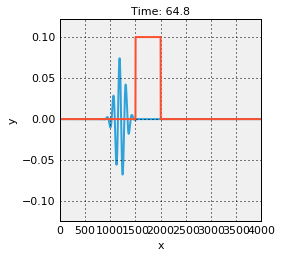
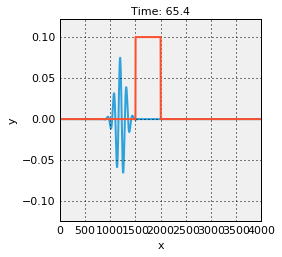
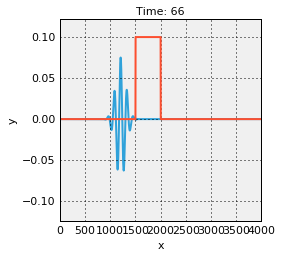
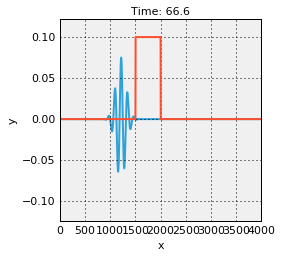
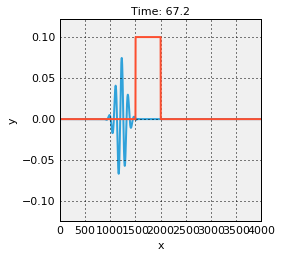
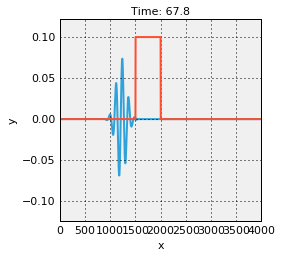
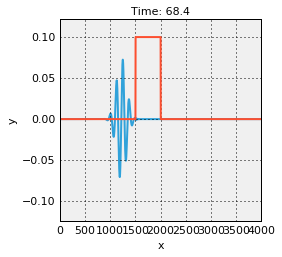
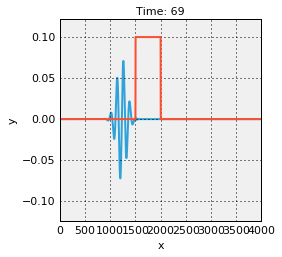
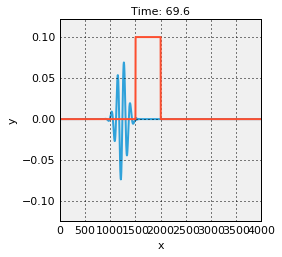
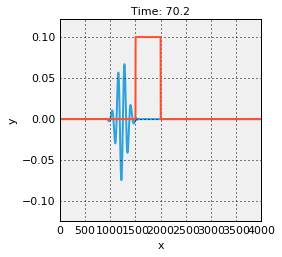
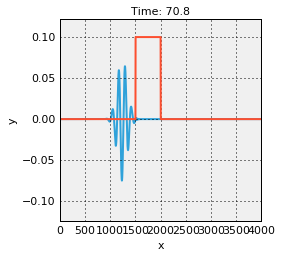
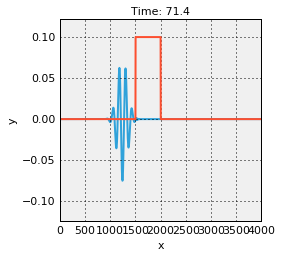
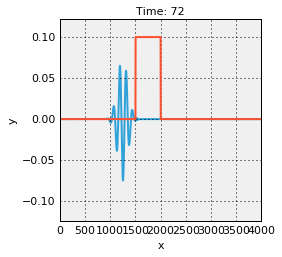
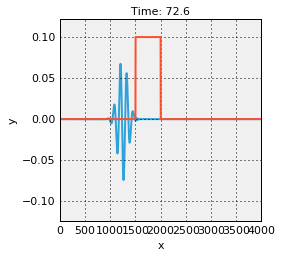
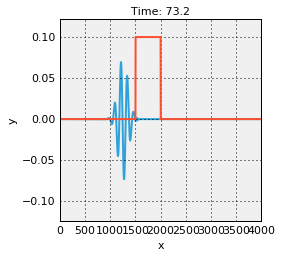
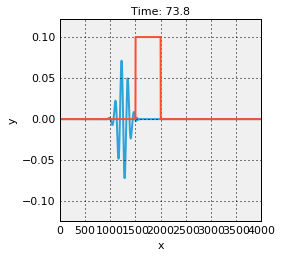
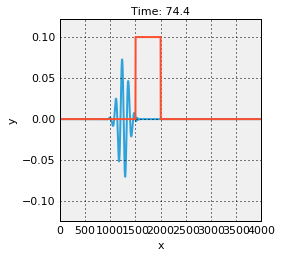
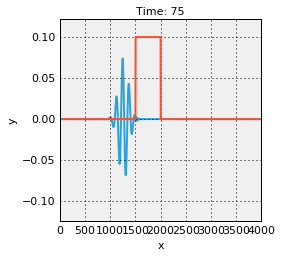
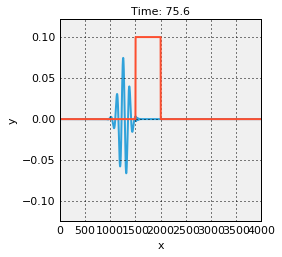
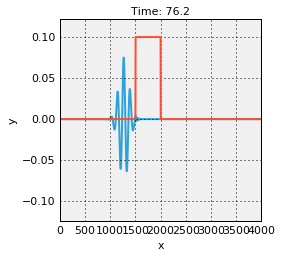
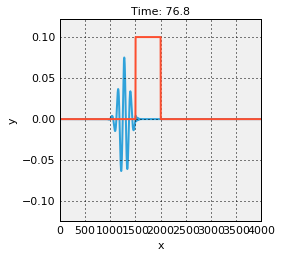
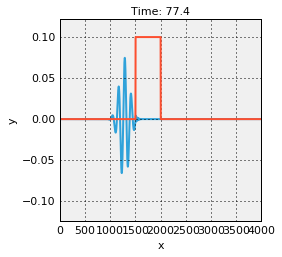
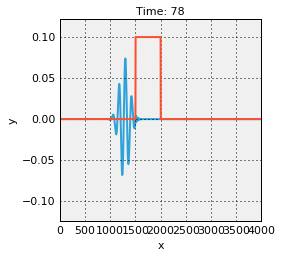
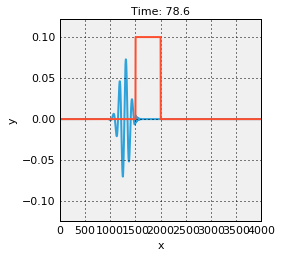
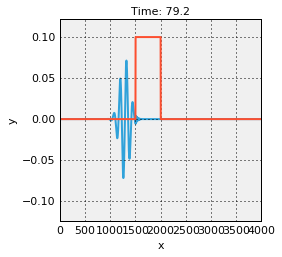
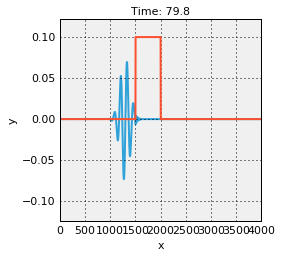
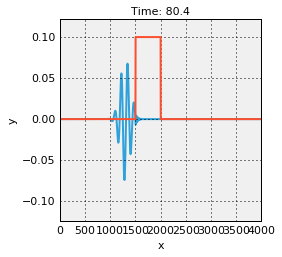
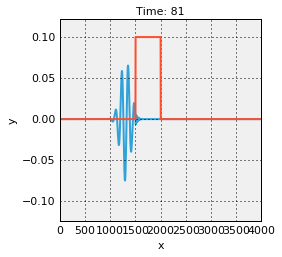
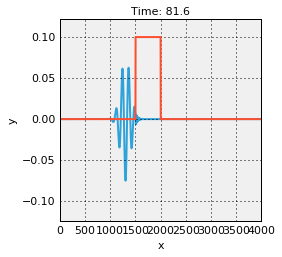
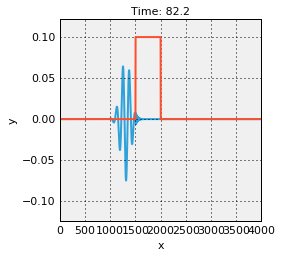
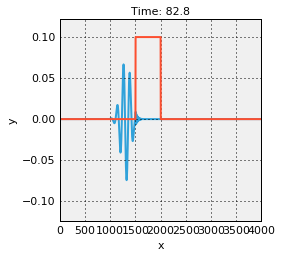
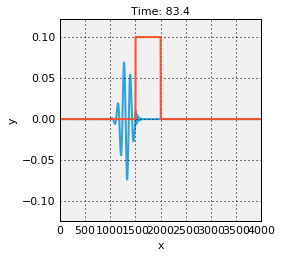
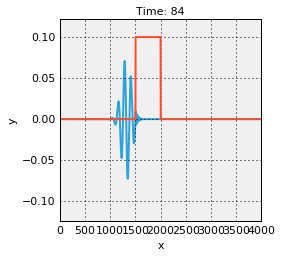
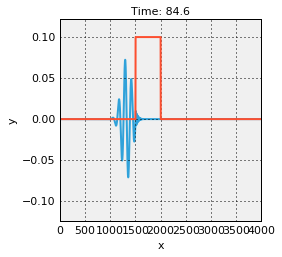
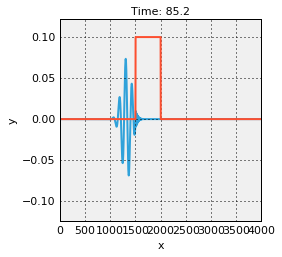
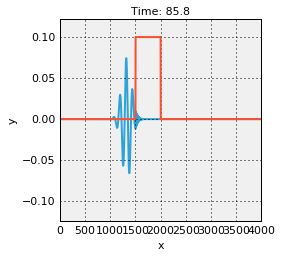
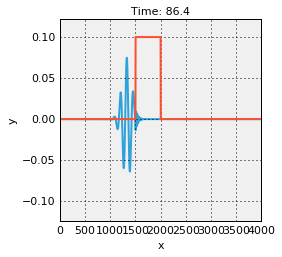
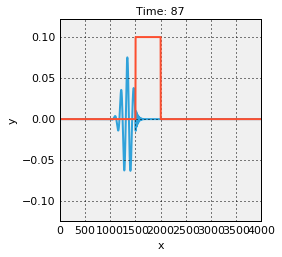
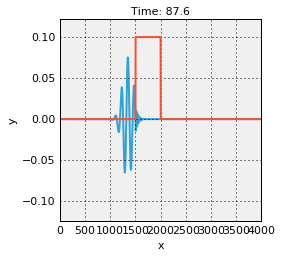
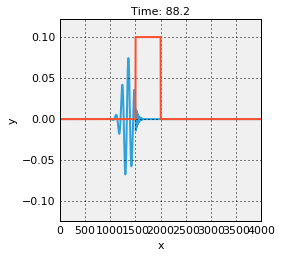
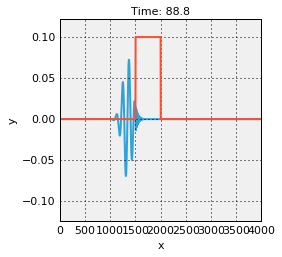
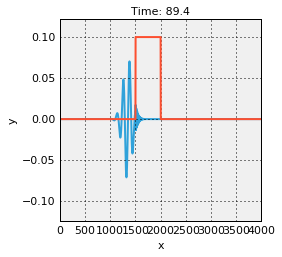
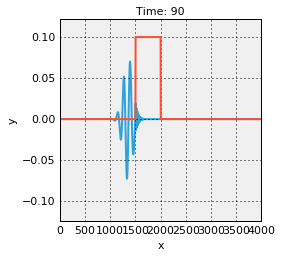
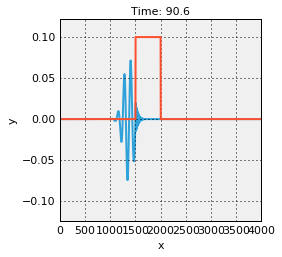
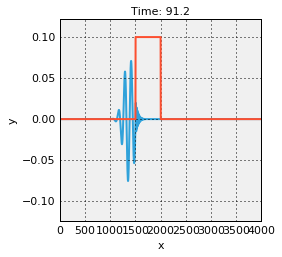
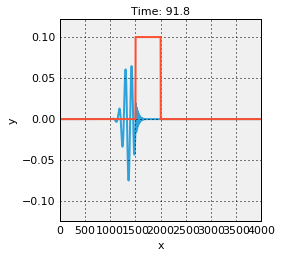
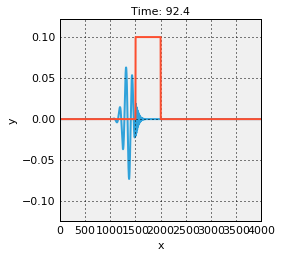
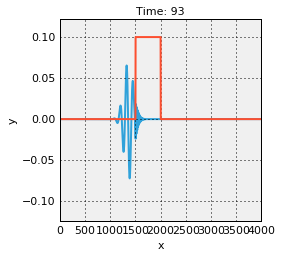
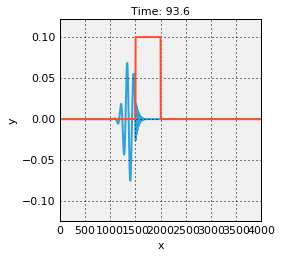
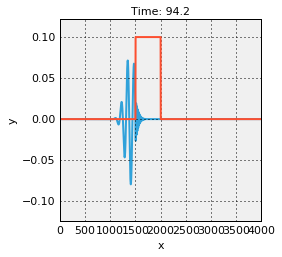
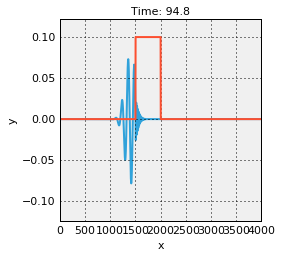
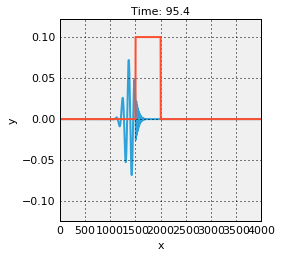
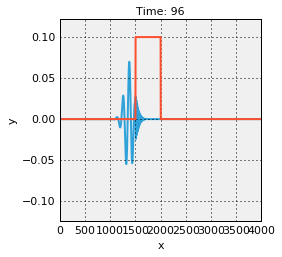
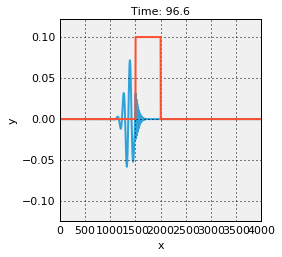
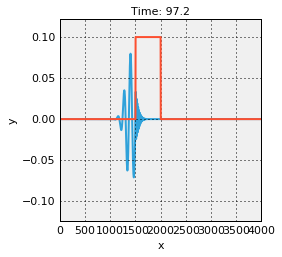
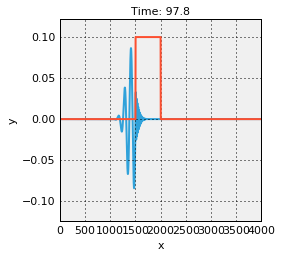
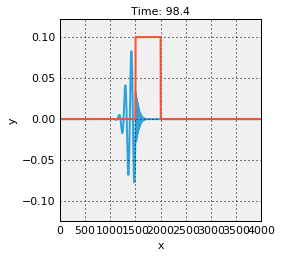
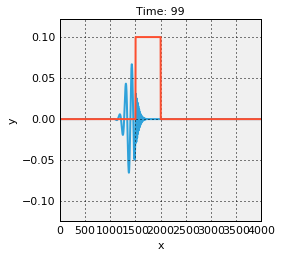
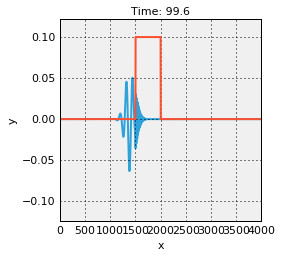
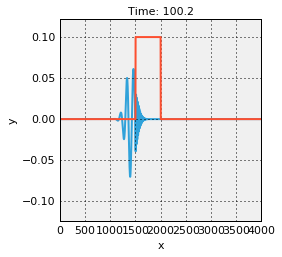
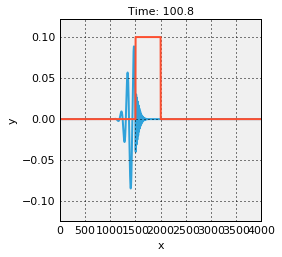
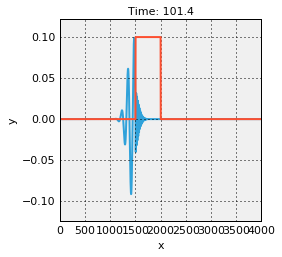
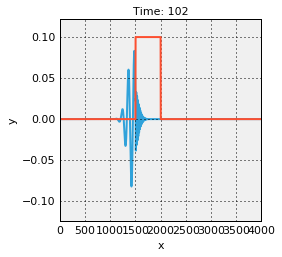
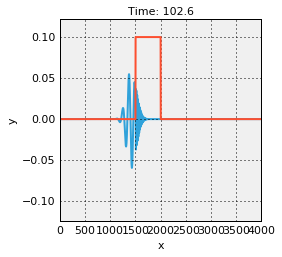
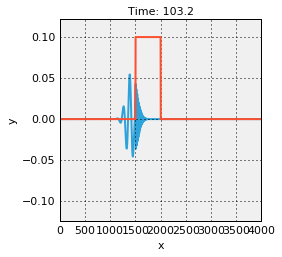
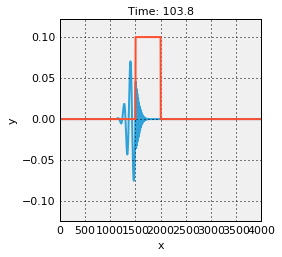
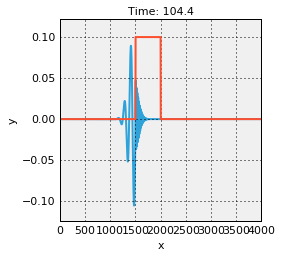
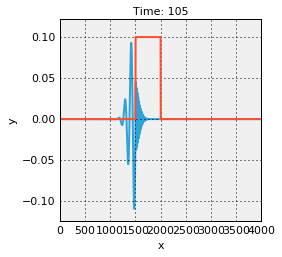
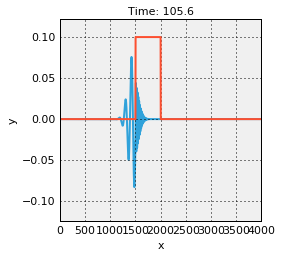
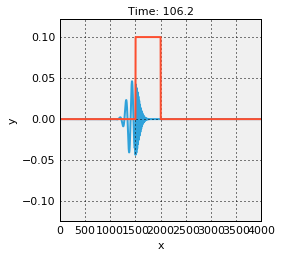
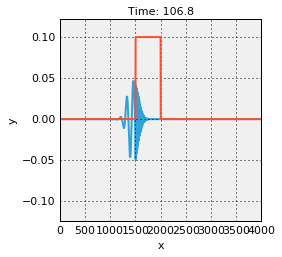
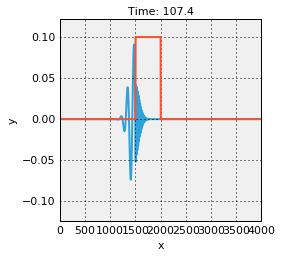
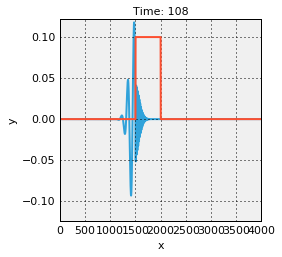
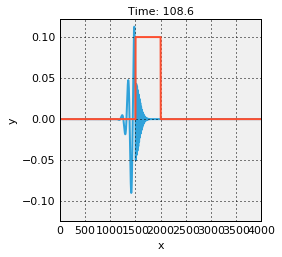
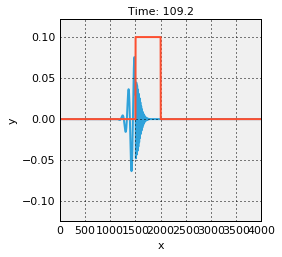
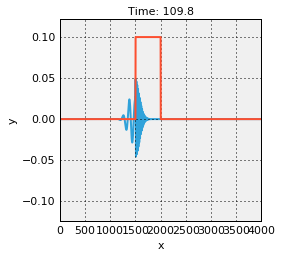
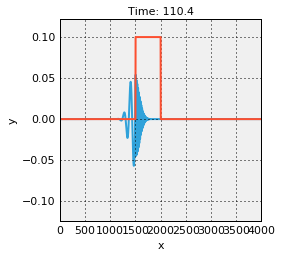
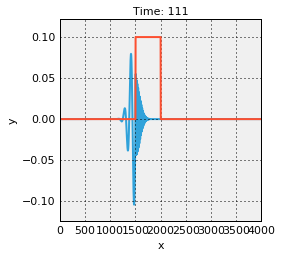
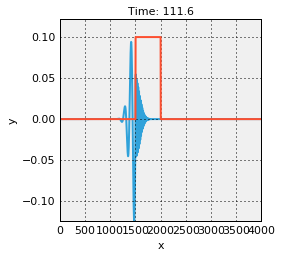
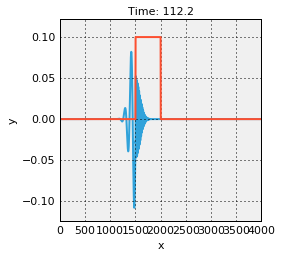
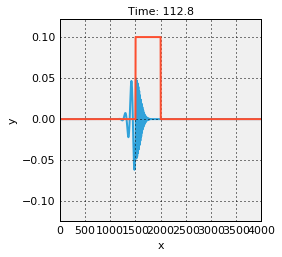
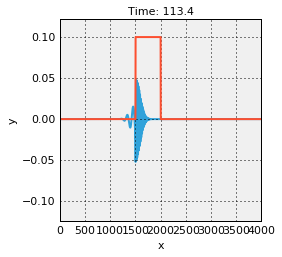
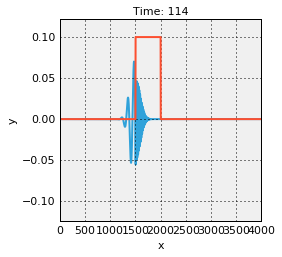
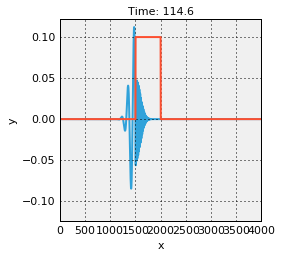
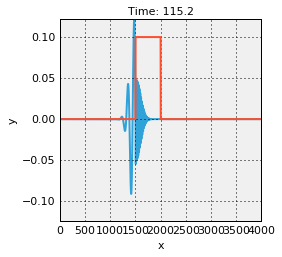
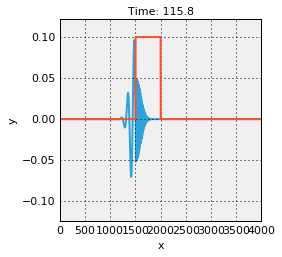
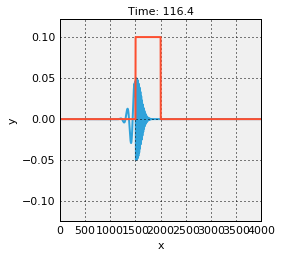
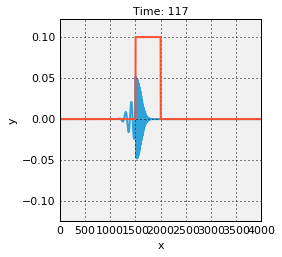
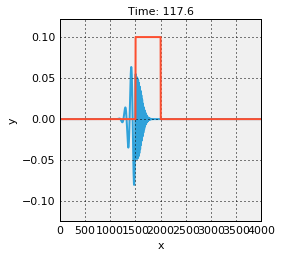
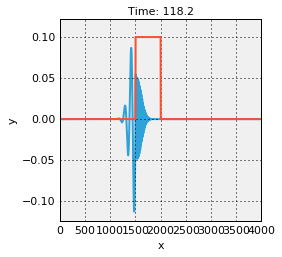
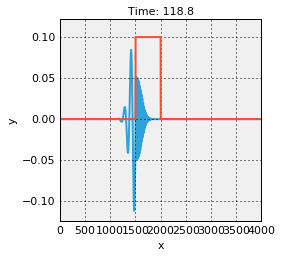
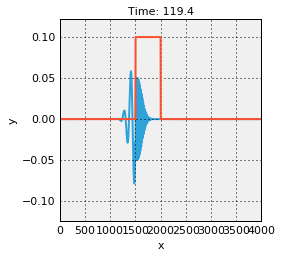
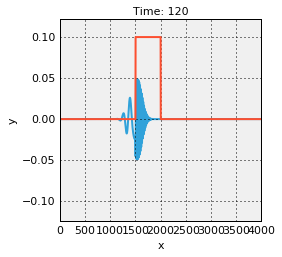
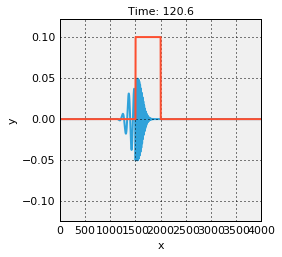
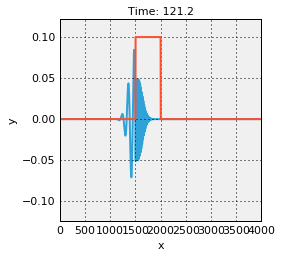
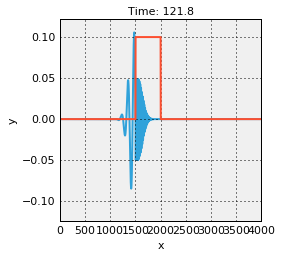
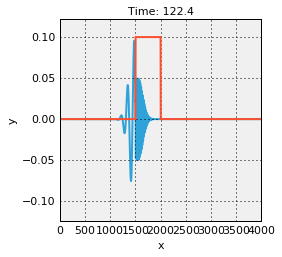
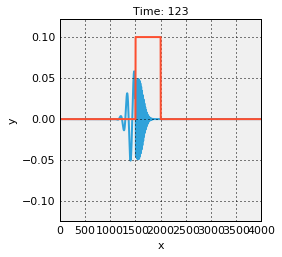
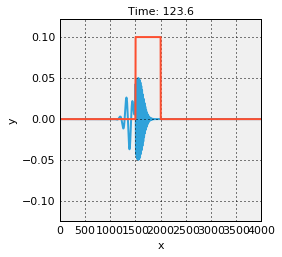
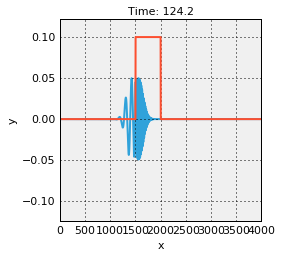
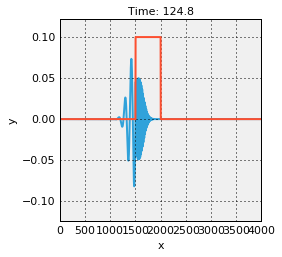
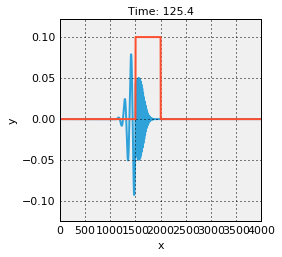
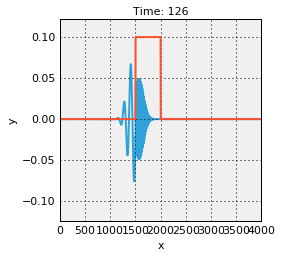
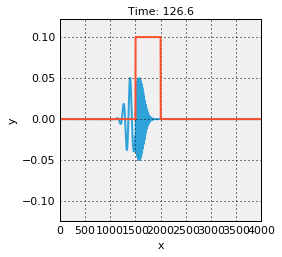
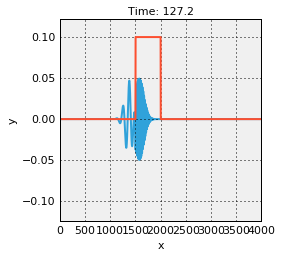
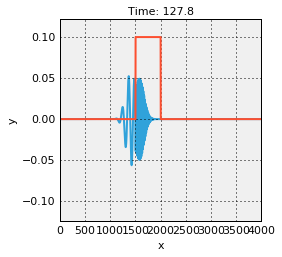
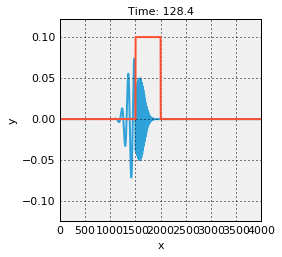
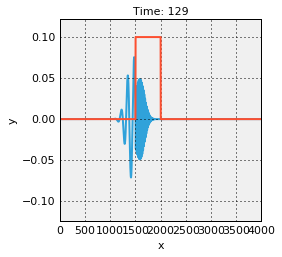
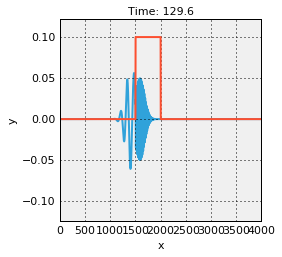
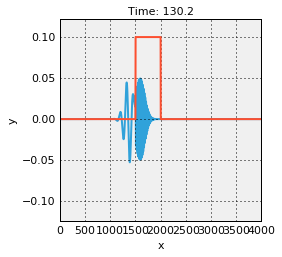
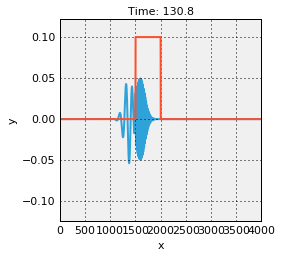
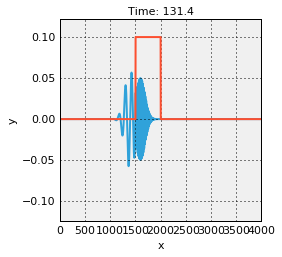
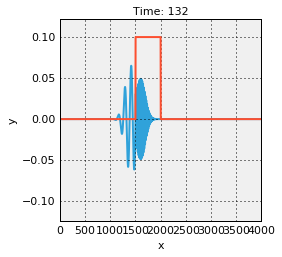
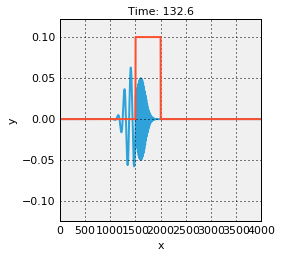
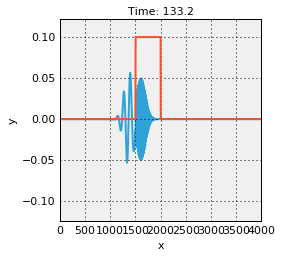
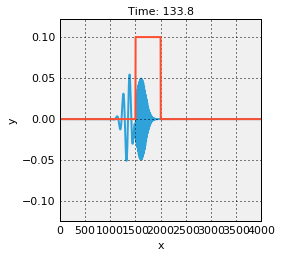
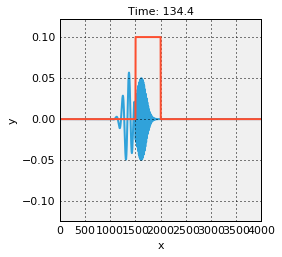
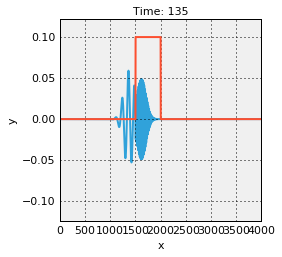
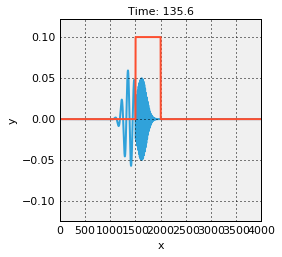
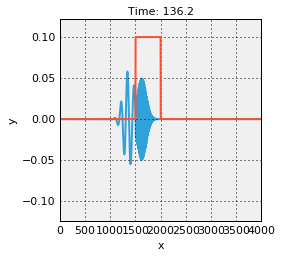
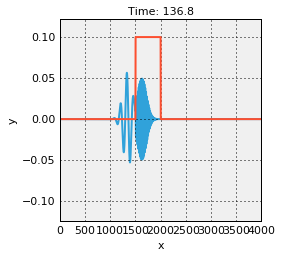
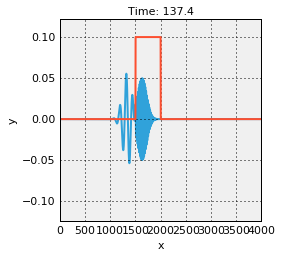
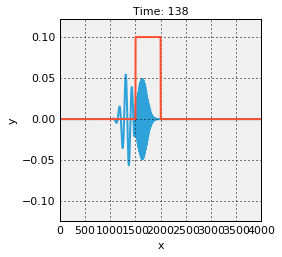
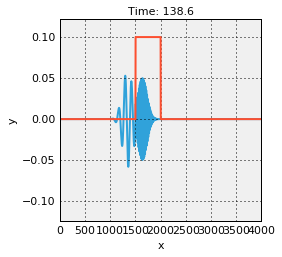
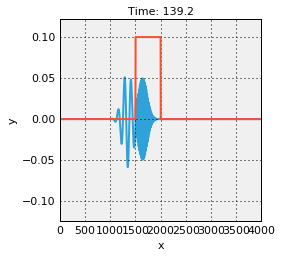
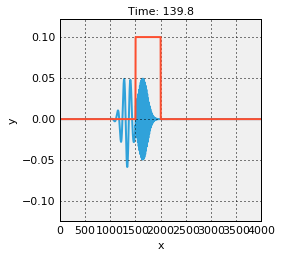
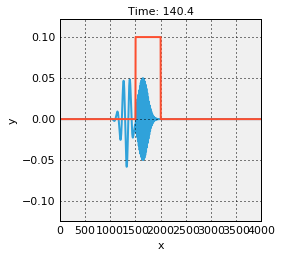
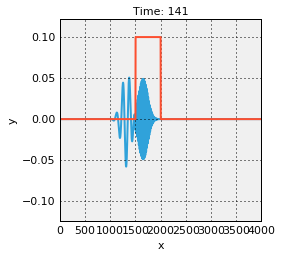
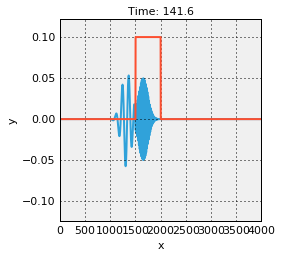
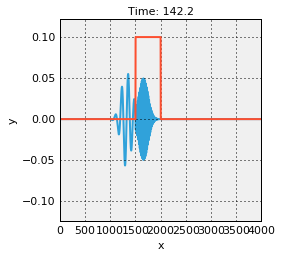
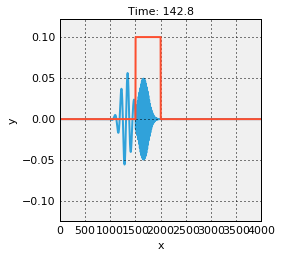
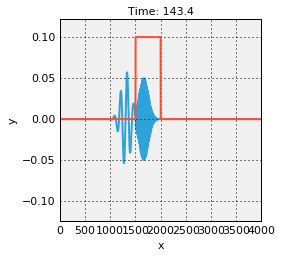
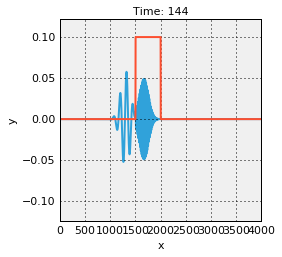
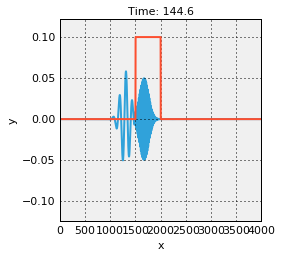
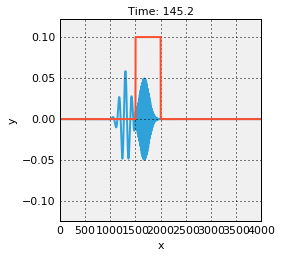
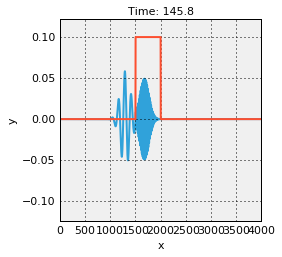
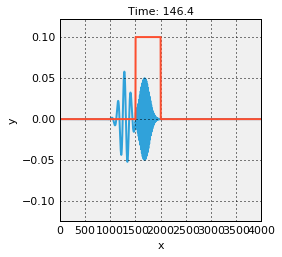
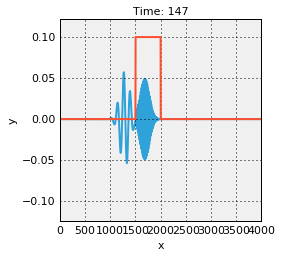
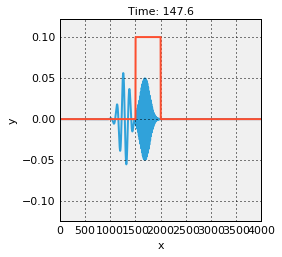
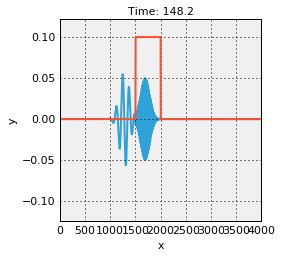
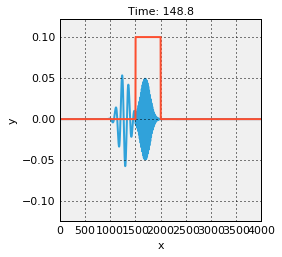
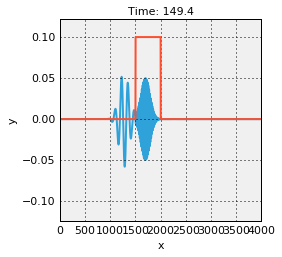
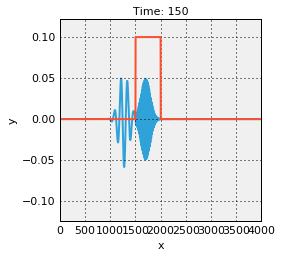
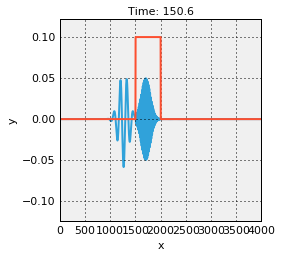
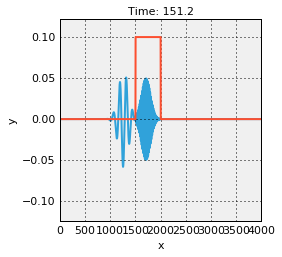
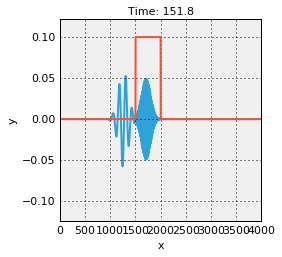
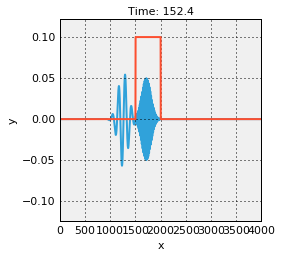
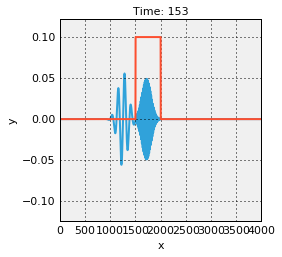
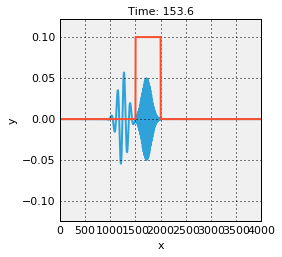
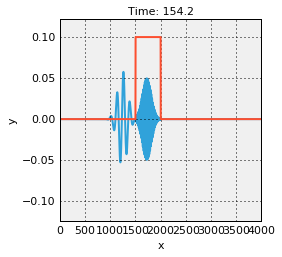
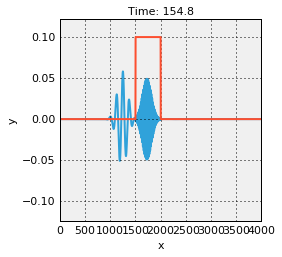
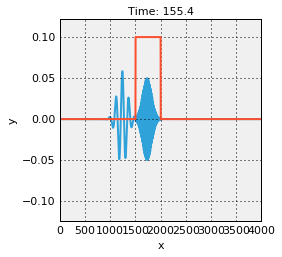
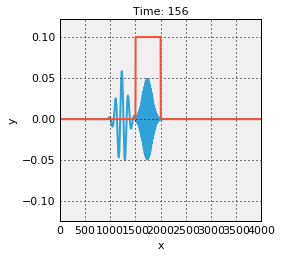
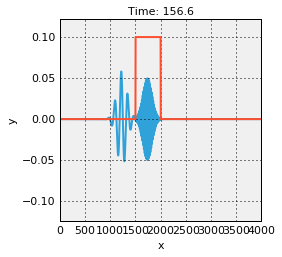
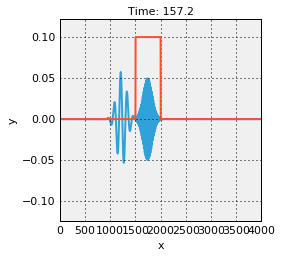
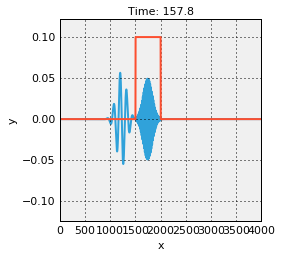
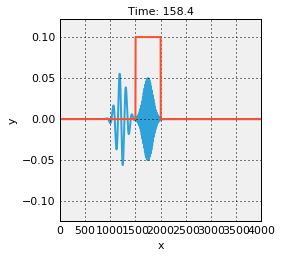
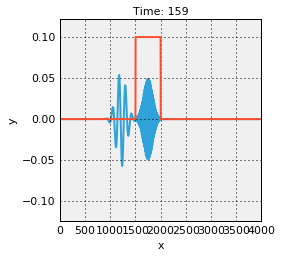
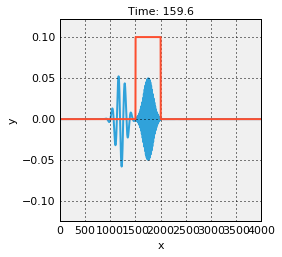
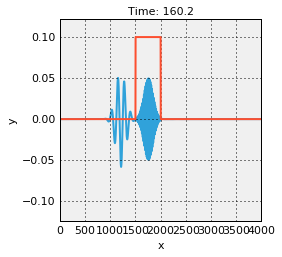
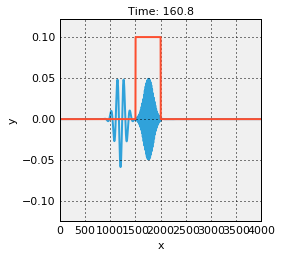
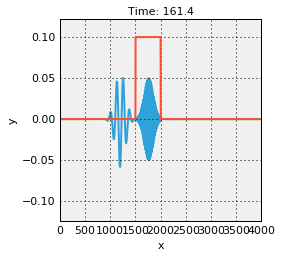
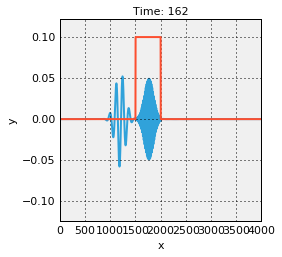
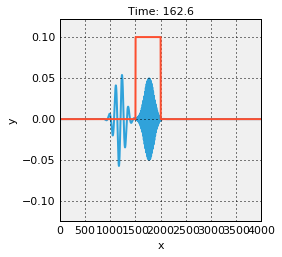
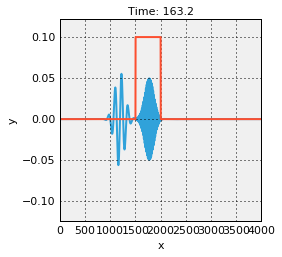
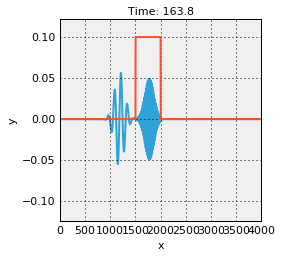
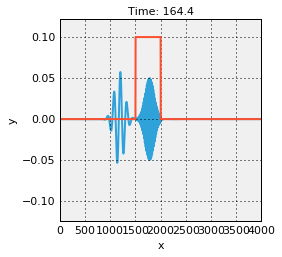
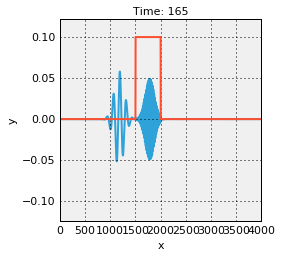
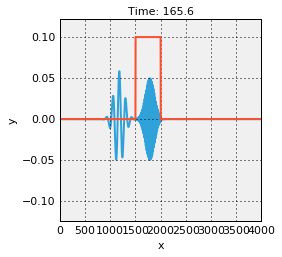
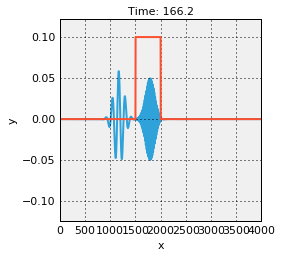
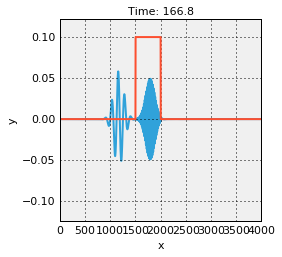
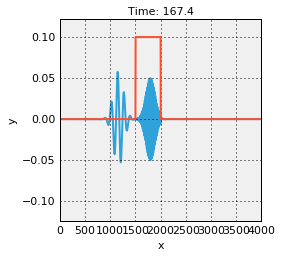
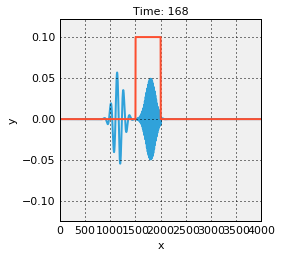
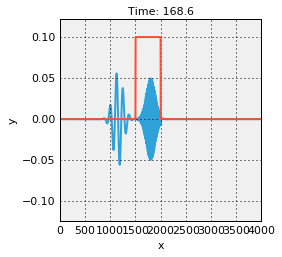
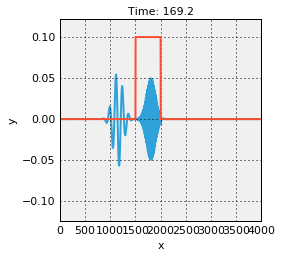
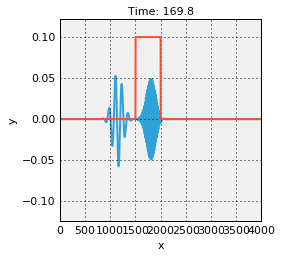
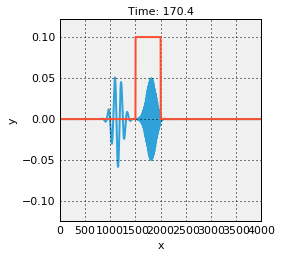
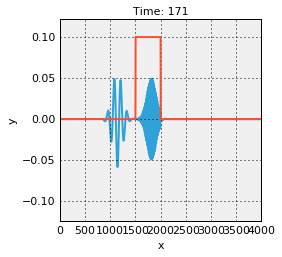
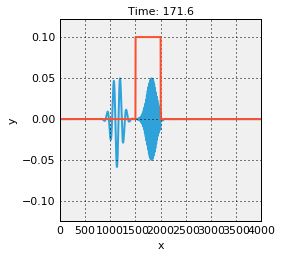
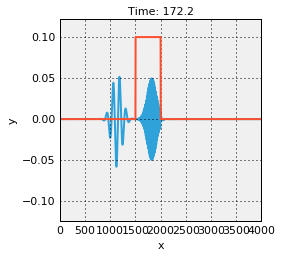
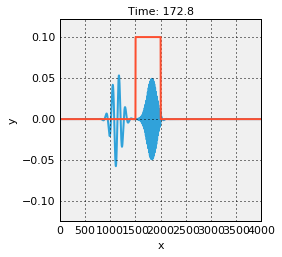
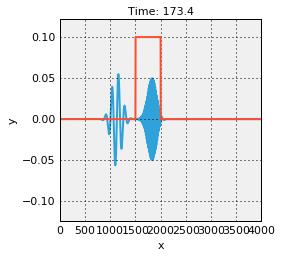
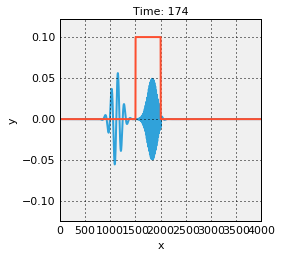
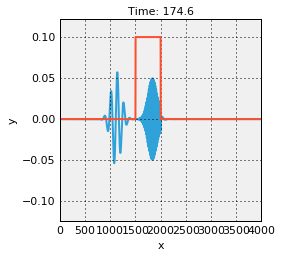
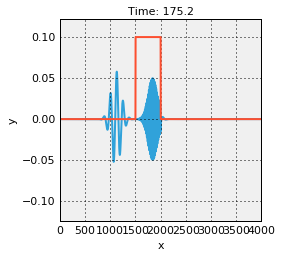
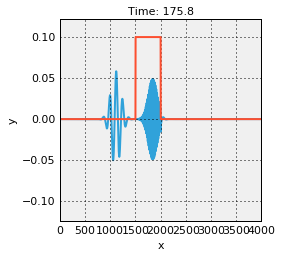
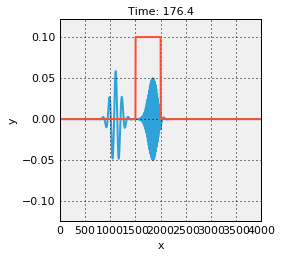
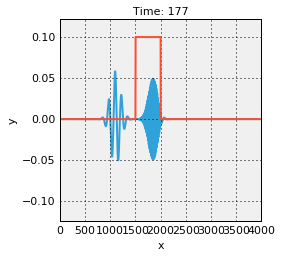
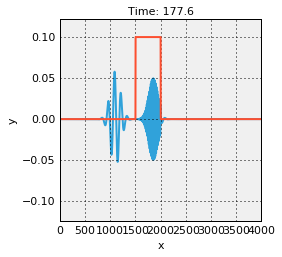
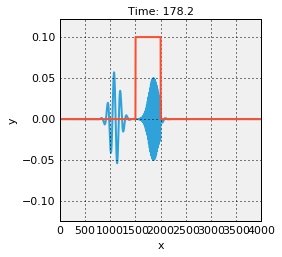
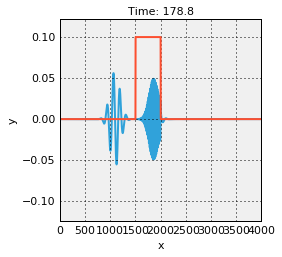
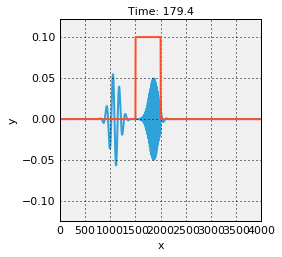
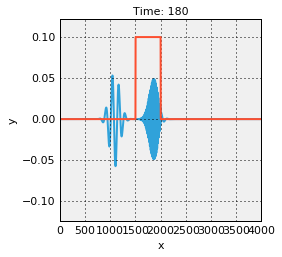
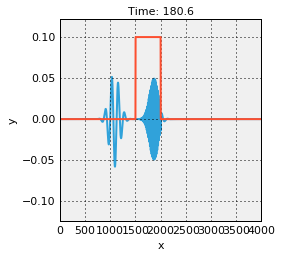
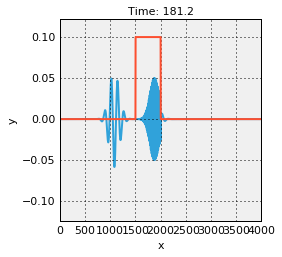
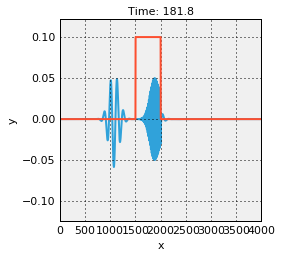
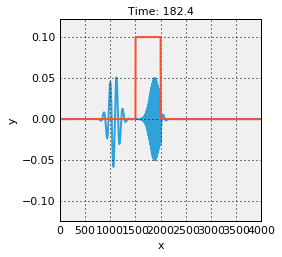
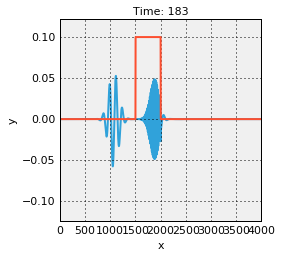
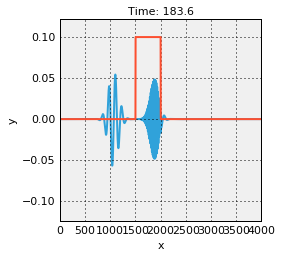
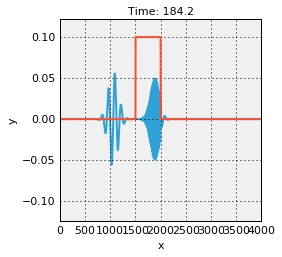
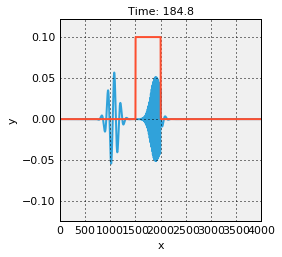
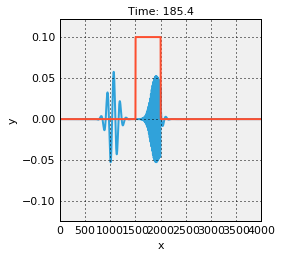
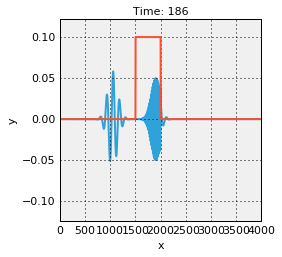
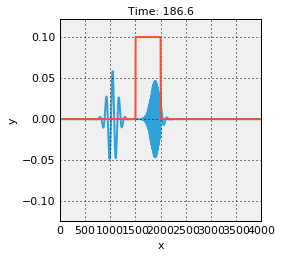
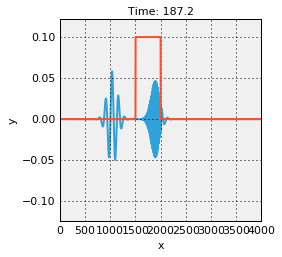
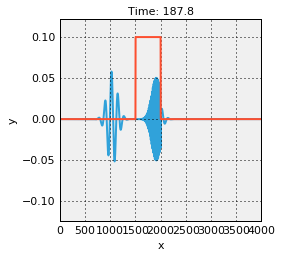
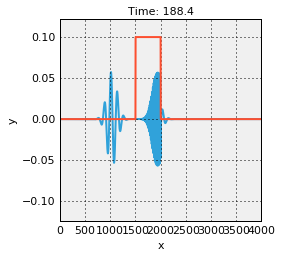
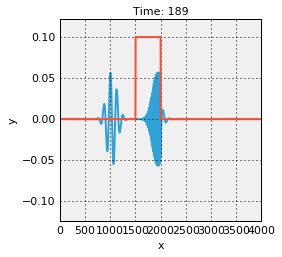
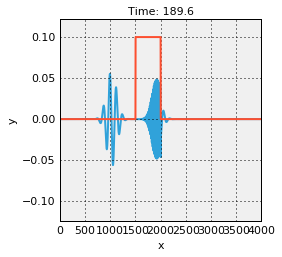
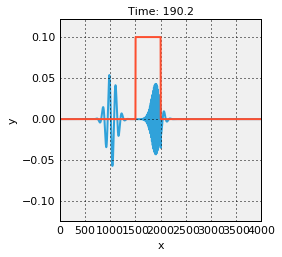
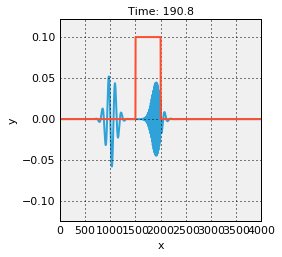
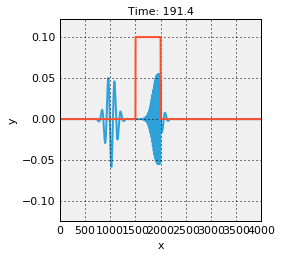
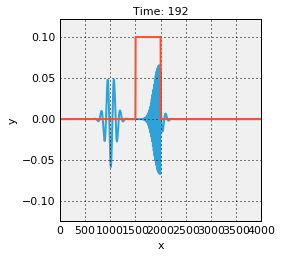
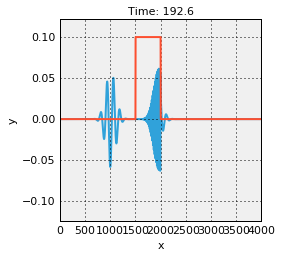
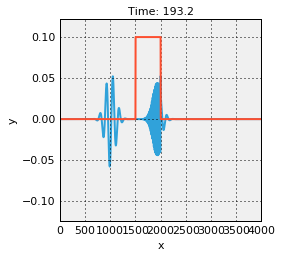
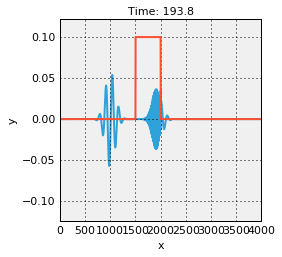
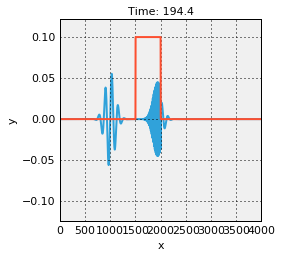
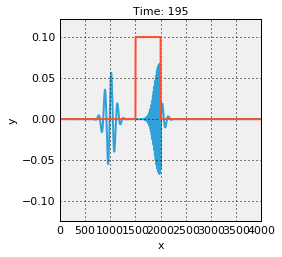
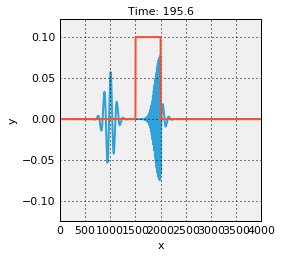
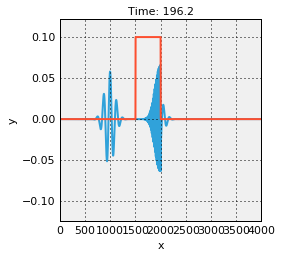
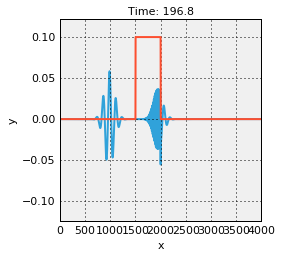
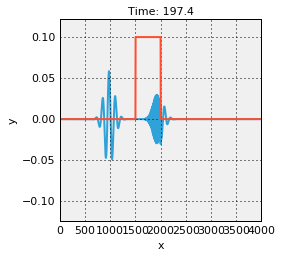
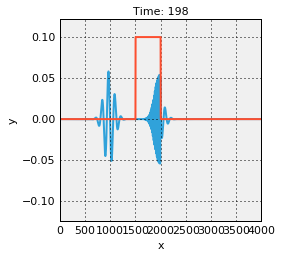
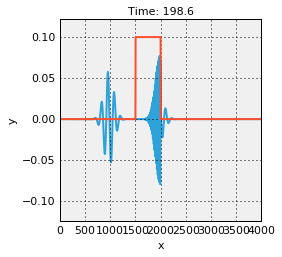
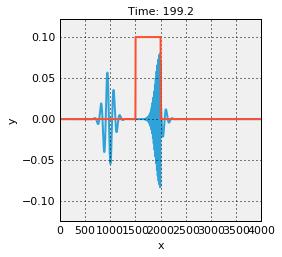
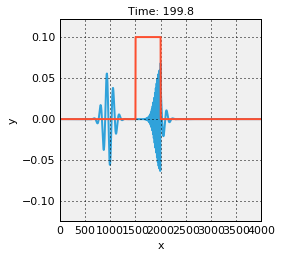
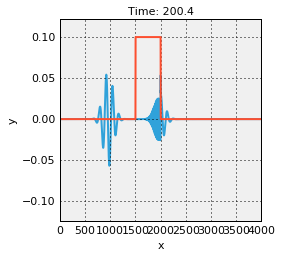
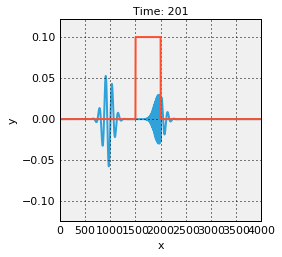
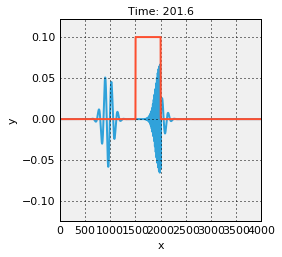
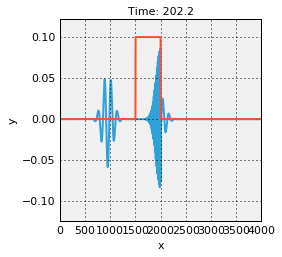
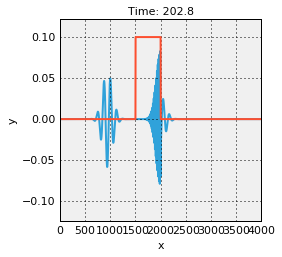
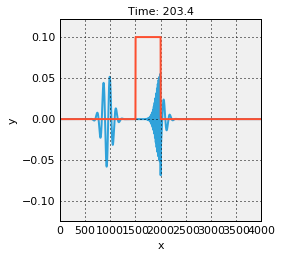
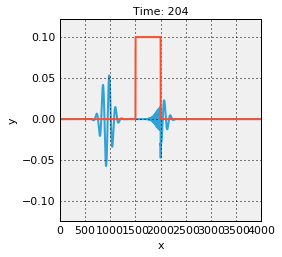
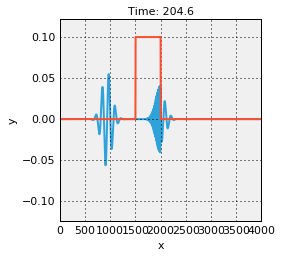
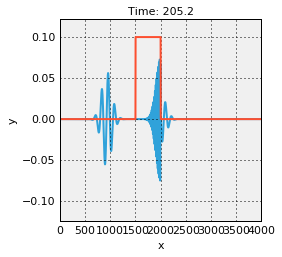
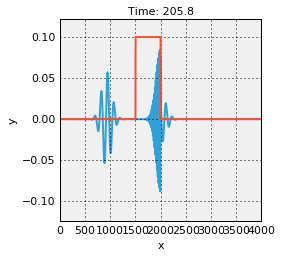
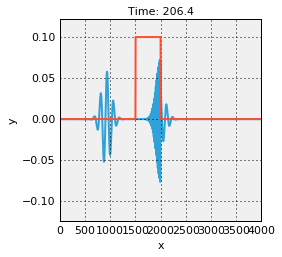
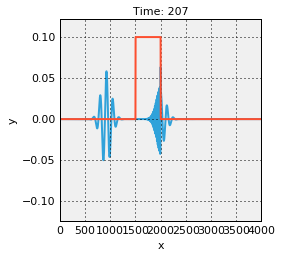
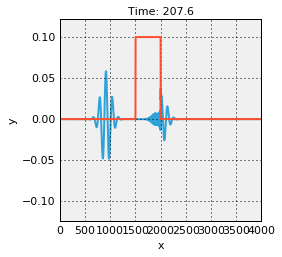
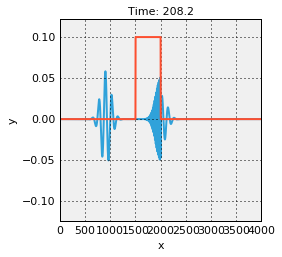
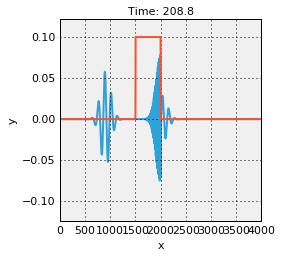
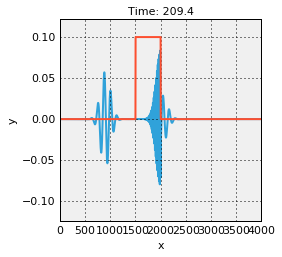
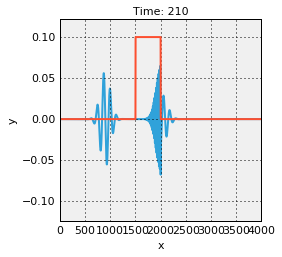
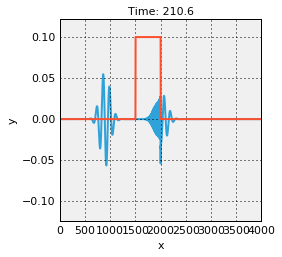
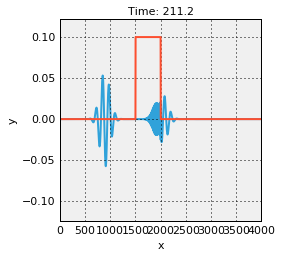
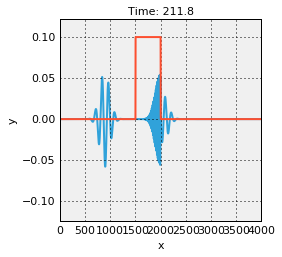
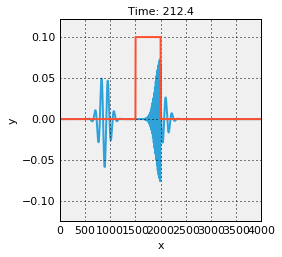
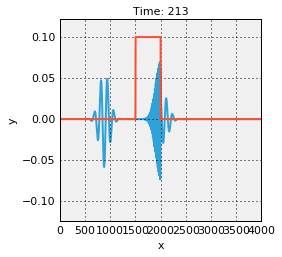
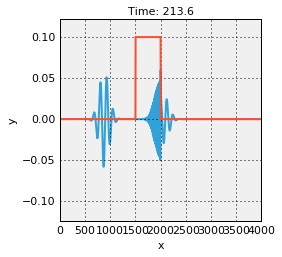
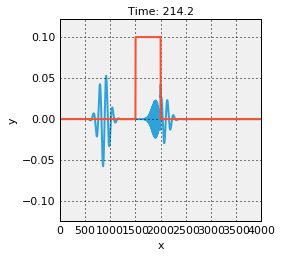
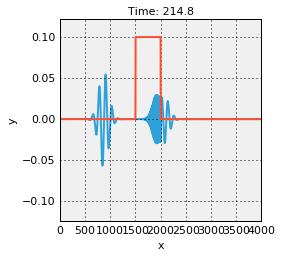
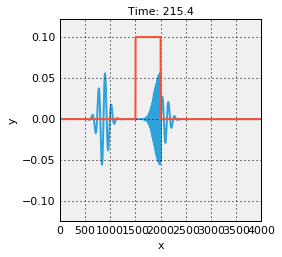
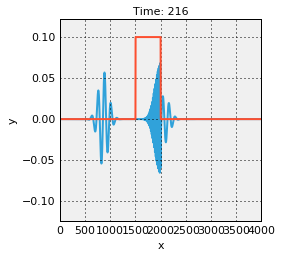
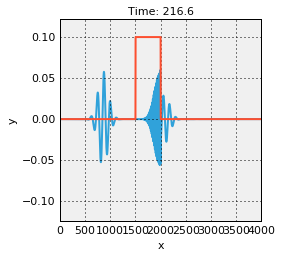
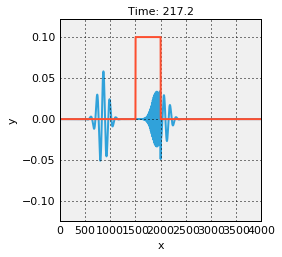
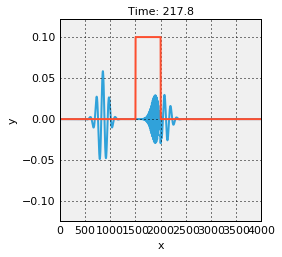
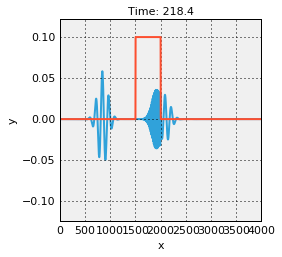
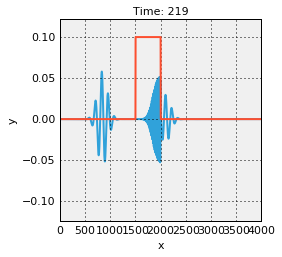
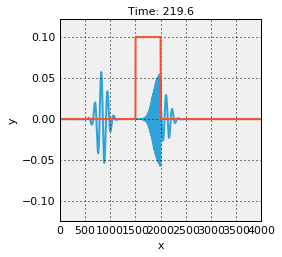
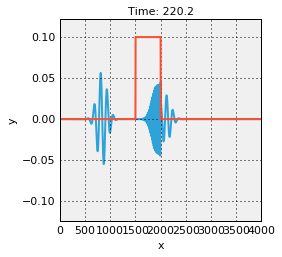
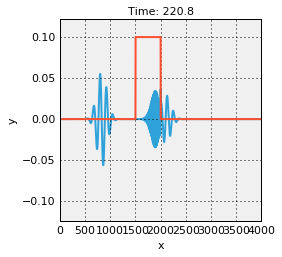
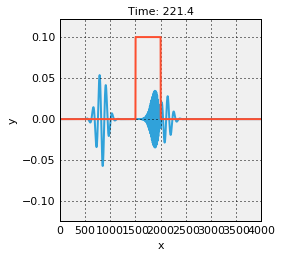
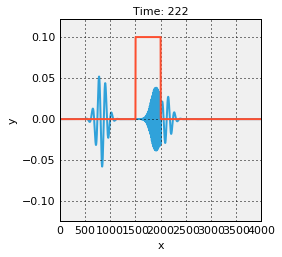
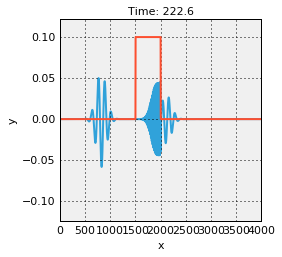
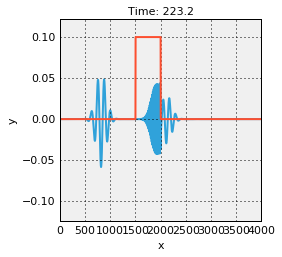
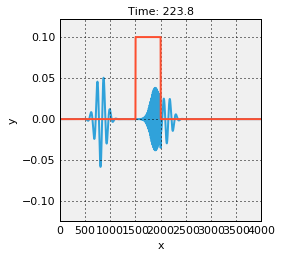
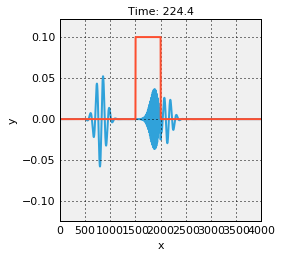
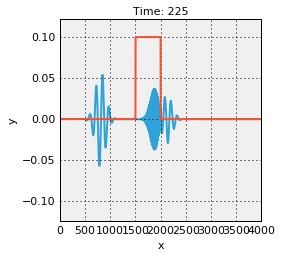
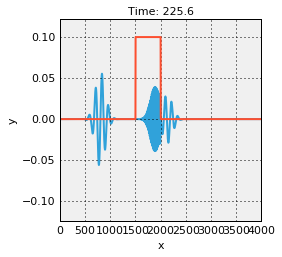
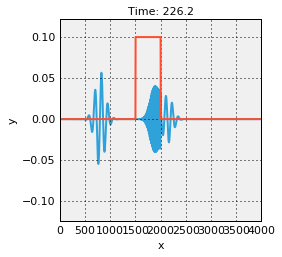
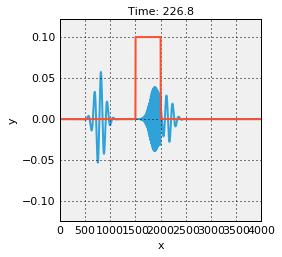
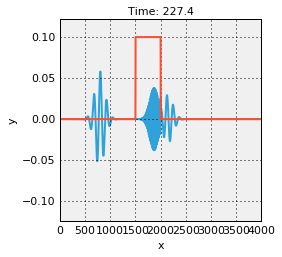
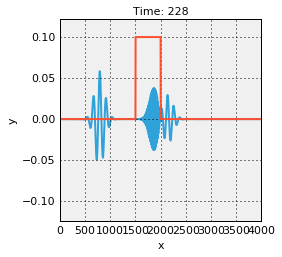
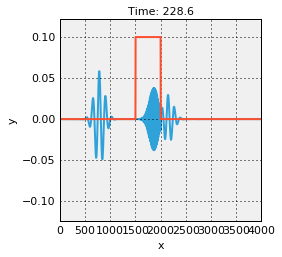
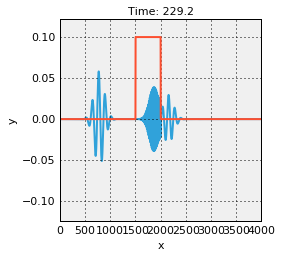
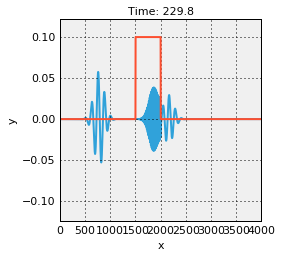
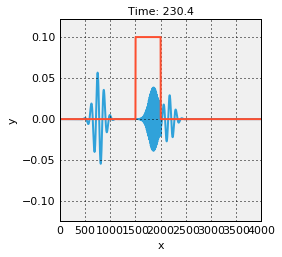
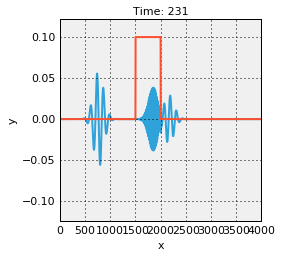
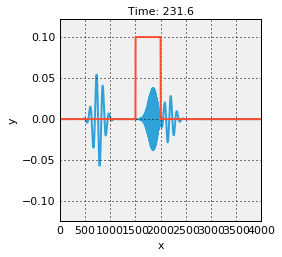
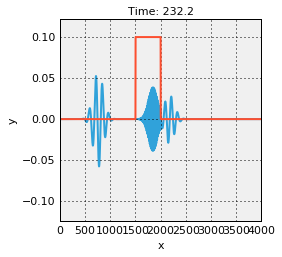
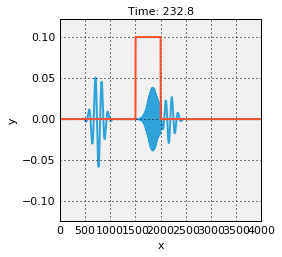
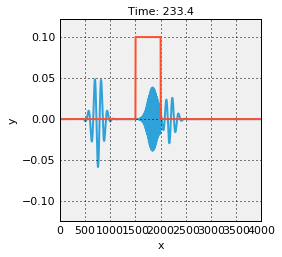
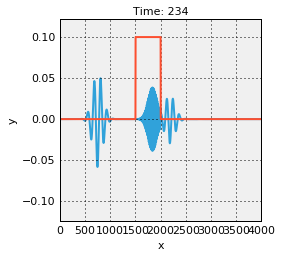
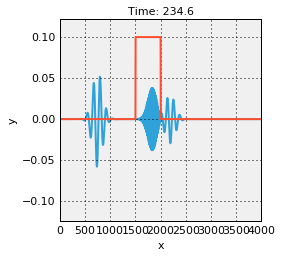
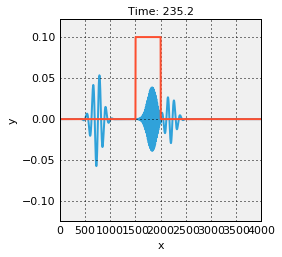
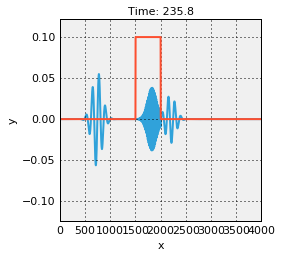
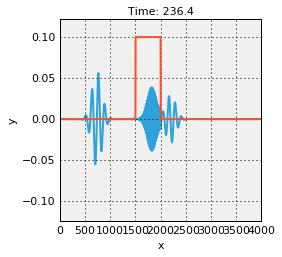
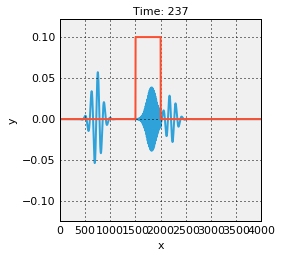
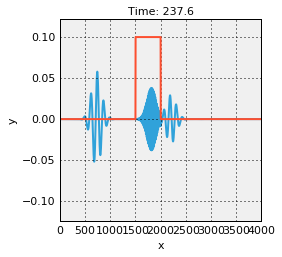
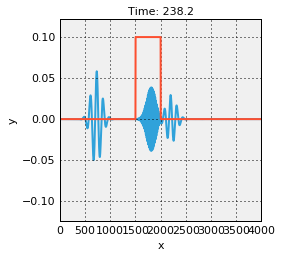
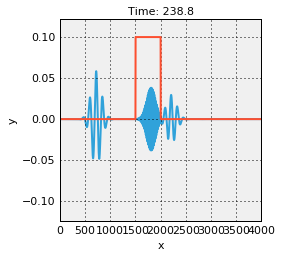
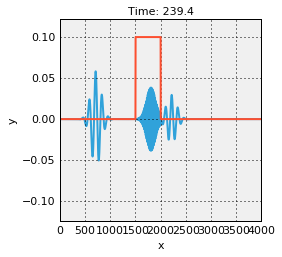
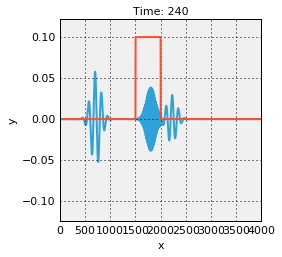
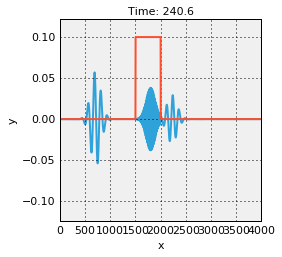
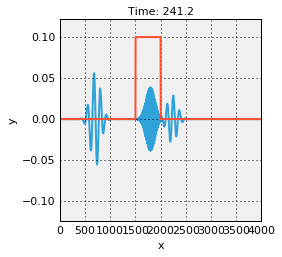
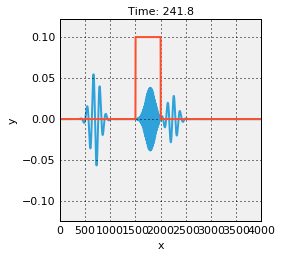
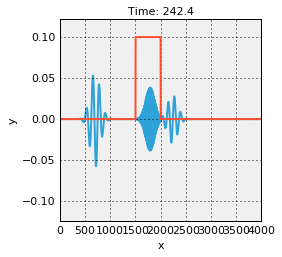
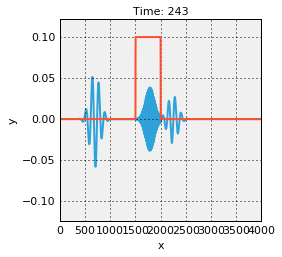
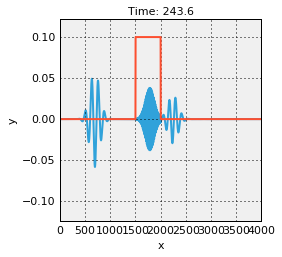
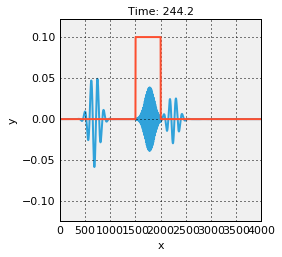
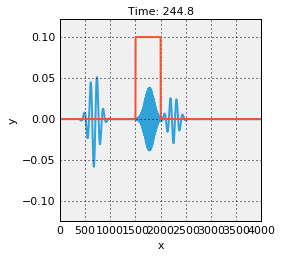
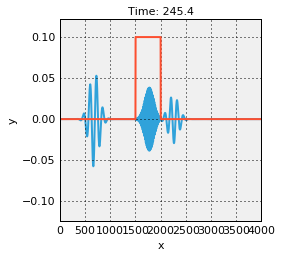
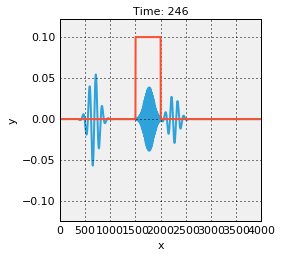
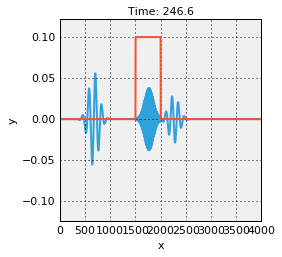
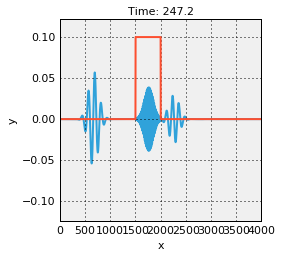
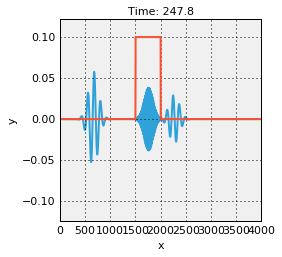
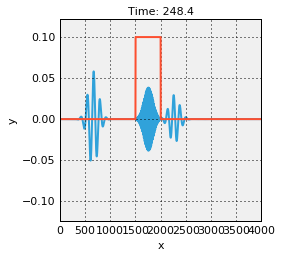
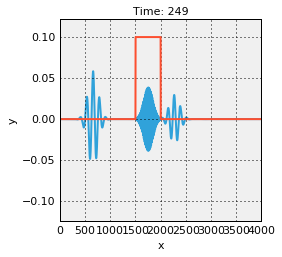
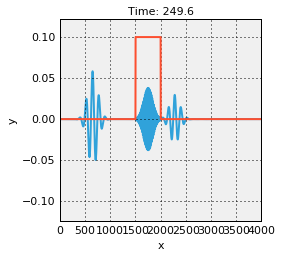
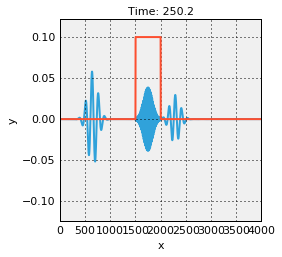
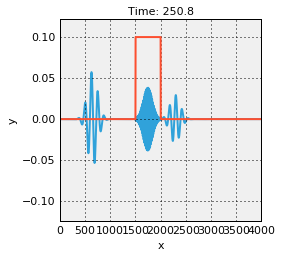
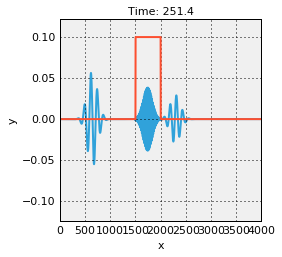
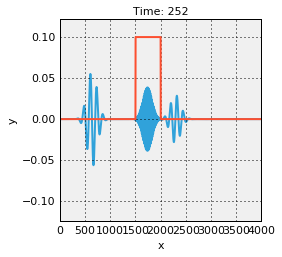
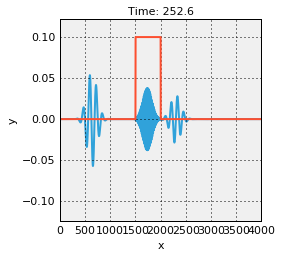
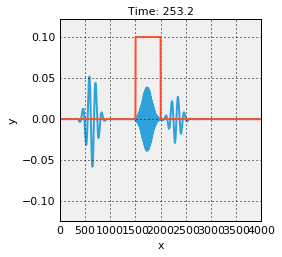
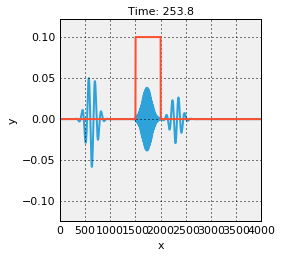
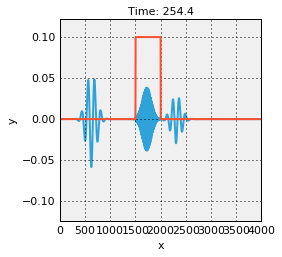
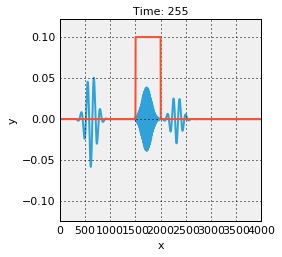
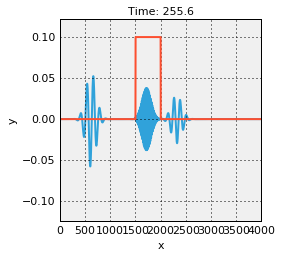
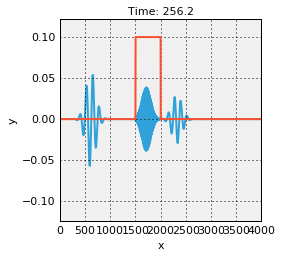
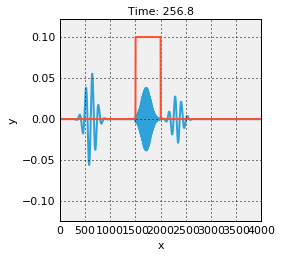
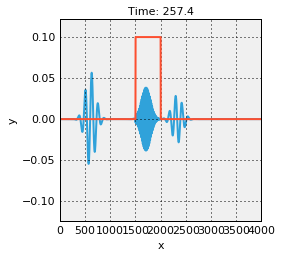
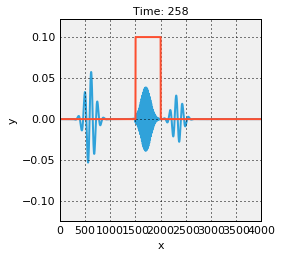
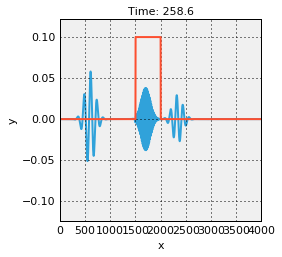
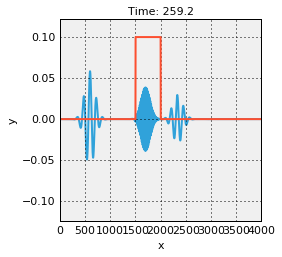
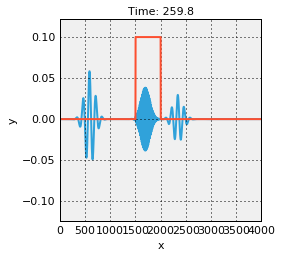
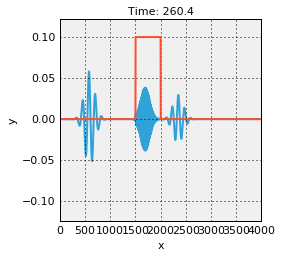
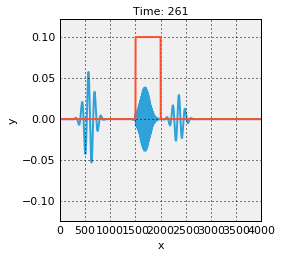
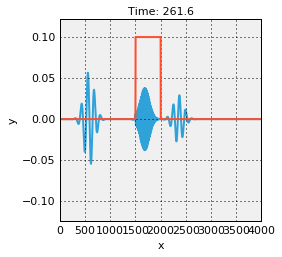
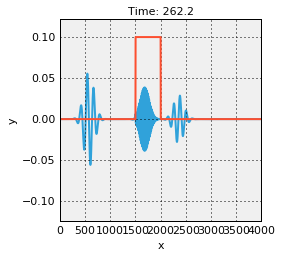
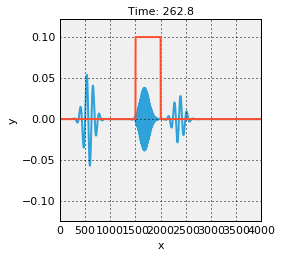
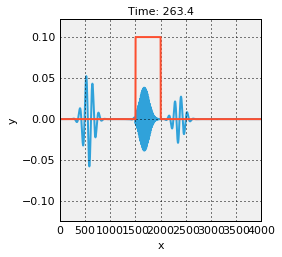
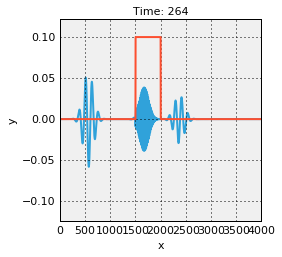
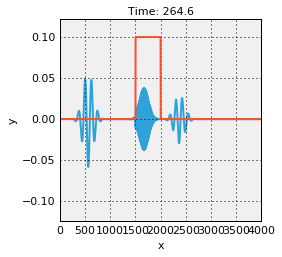
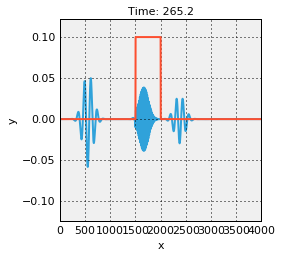
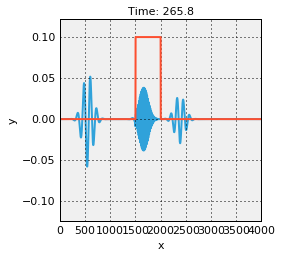
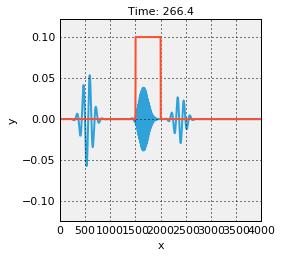
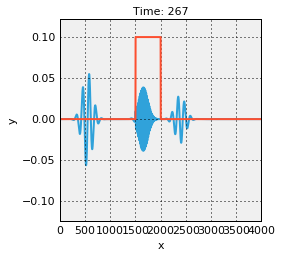
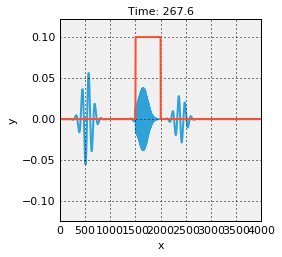
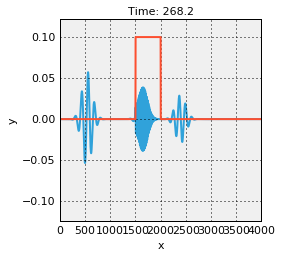
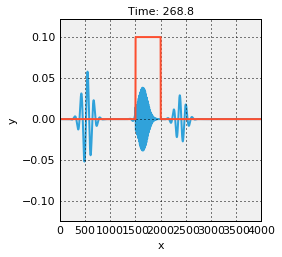
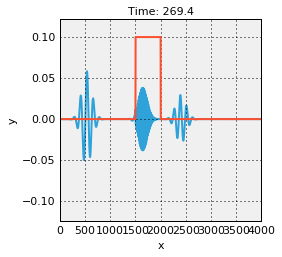
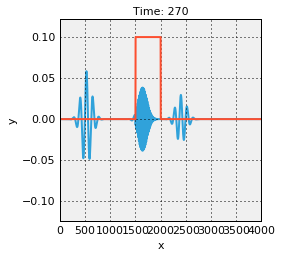
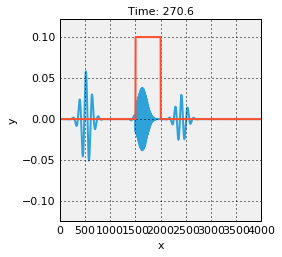
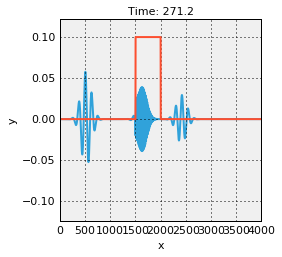
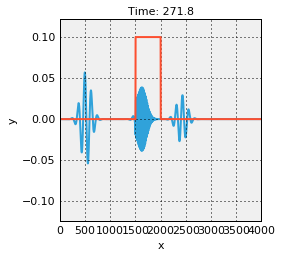
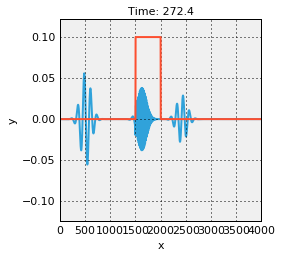
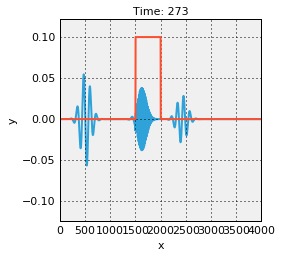
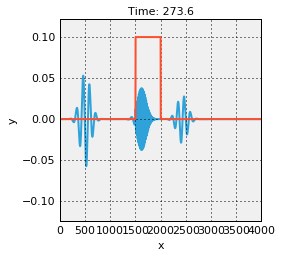
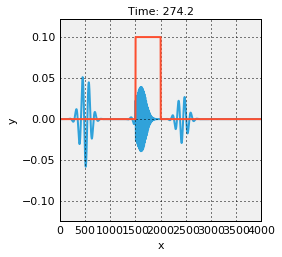
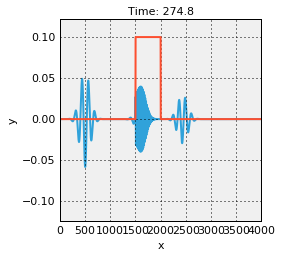
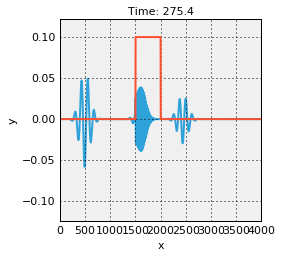
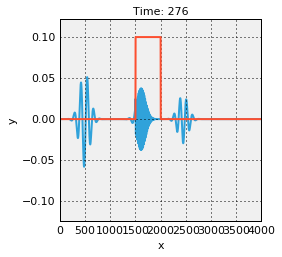
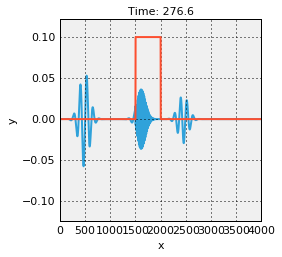
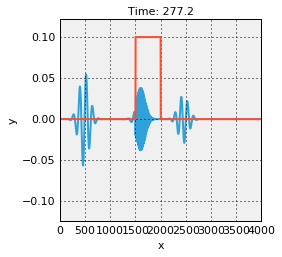
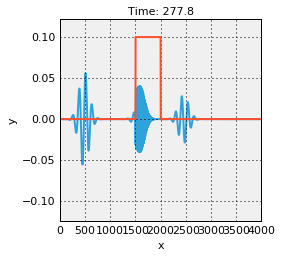
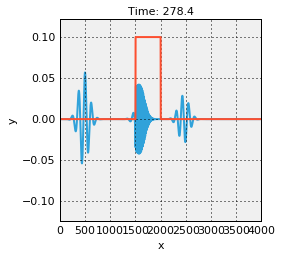
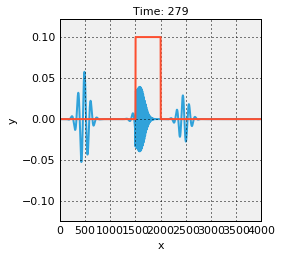
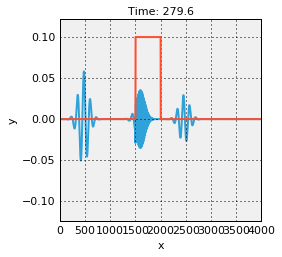
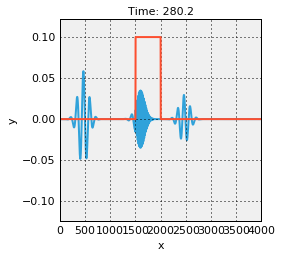
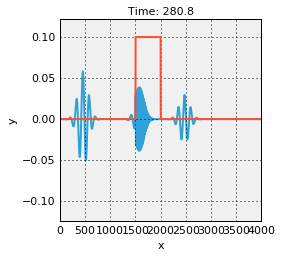
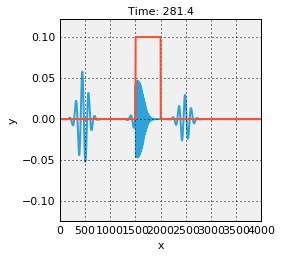
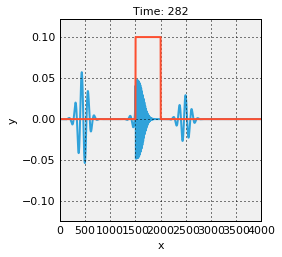
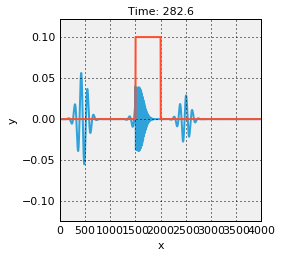
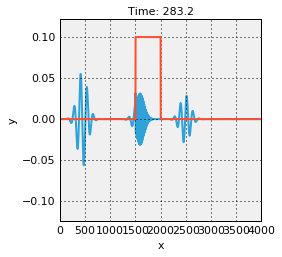
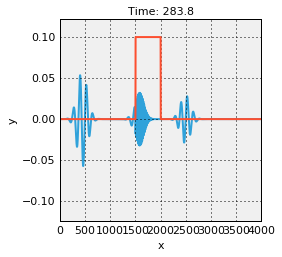
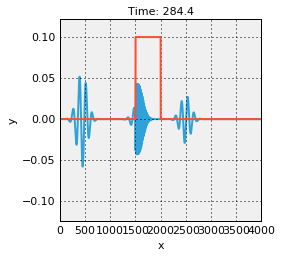
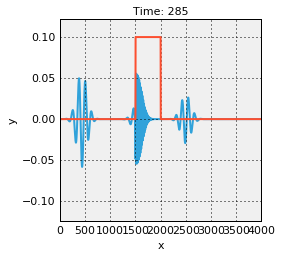
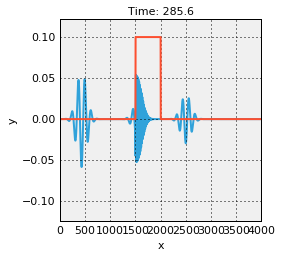
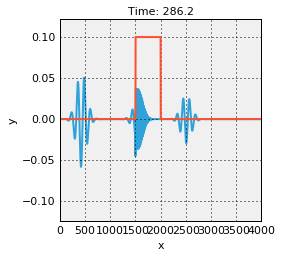
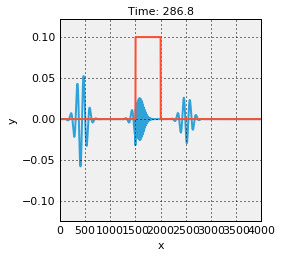
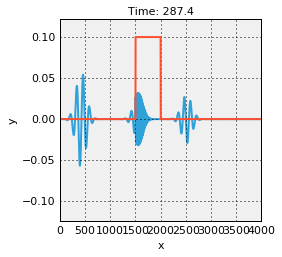
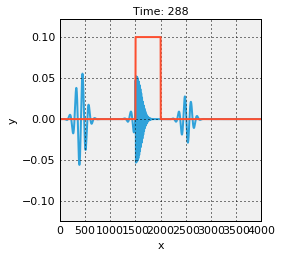
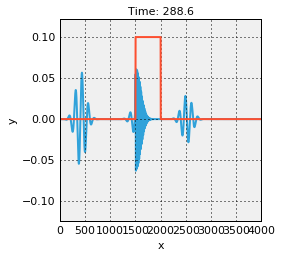
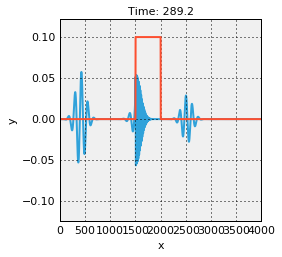
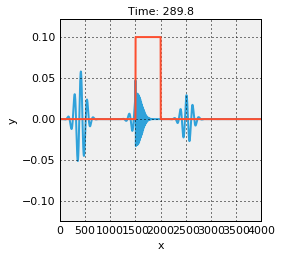
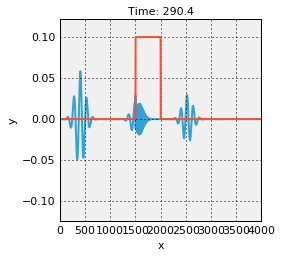
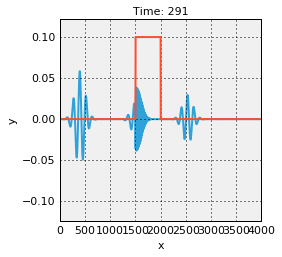
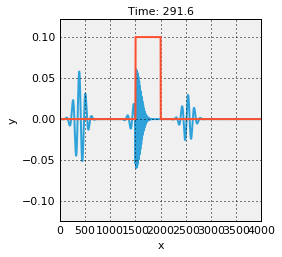
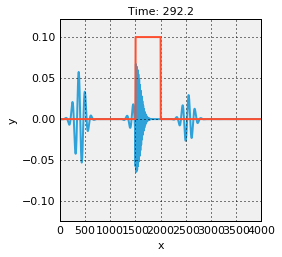
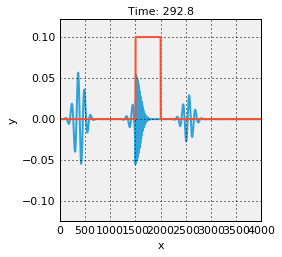
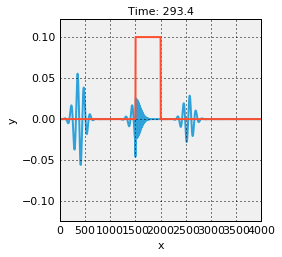
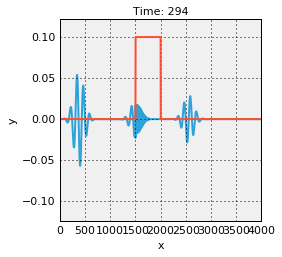
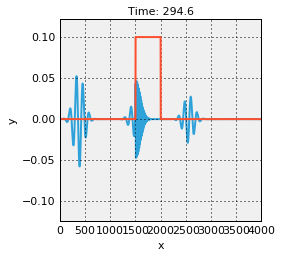
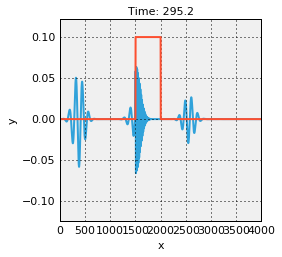
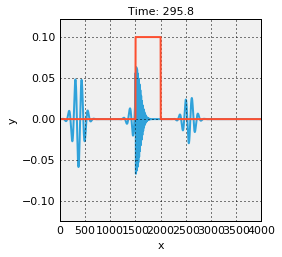
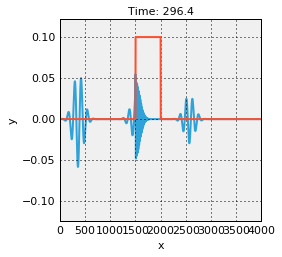
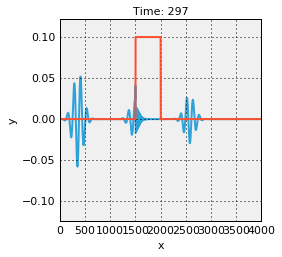
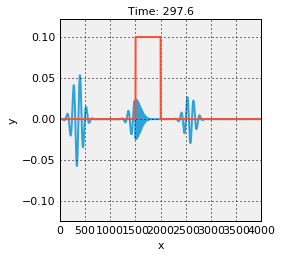
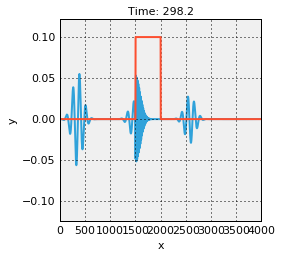
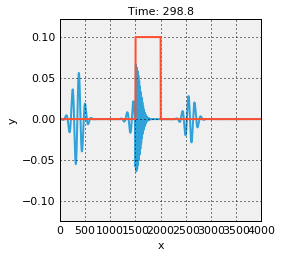

In [21]:
%output holomap='scrubber'
hv.HoloMap([(
            i*dt, hv.Curve(np.real(psi_r[:, i])) * hv.Curve(V/20) )
            for i in range(0,499)], kdims = ["Time"])